# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

In [413]:
# "Saudi Arabia actually has one of the highest rates of road deaths in the world, with 28 people dying for every 100,000" ,
# this quote raise a lot of questions need to be answered which will be by doing some analysis.
# This project i will be analyzing two data sets (CSV files), one containing driving licenses for each year for each region
# and the other containing accidents for each year for each region, the goal is to analysis these data and get insite
# to give reasoning about number of accidents behavior over the years and in each region.

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

In [414]:
# Answer:
# by observing the data we can see the trends, and there is correlation between number of licenses and number of accidents,
# and that make sense because with more licenses means more drivers lead to crowded cites will lead to 
# more accidents, but we notice that some regions have sudden decrease on accidents on the later years, with the outside 
# research i think with there are several reasons, such as raise of VAT and fuel prices and implementing of saher system

# i think with more features we can git more insite, such as the cause of accidents, price of fuel, more year data for accidents
# to observe the number of accidents before and after implementing saher

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [415]:
#Imports libraries

import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina' # high dimension pics
%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [416]:
#Code
# read csv files
df_accidents=pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv', sep=';')
df_licenses=pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv', sep=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [417]:
#Code
df_accidents.drop(columns=['Unnamed: 0','Unnamed: 0.1']).head(10) # show 10 rows

,Year,Region,Indicator,Value,geo_point_2d
0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [418]:
df_accidents['Value'].apply(lambda x:x.replace('n','')) # remove n from numerical columns

0      12383
1       1113
2        434
3        299
4      10199
5        193
6      22161
7      10469
8       7489
9        631
10       514
11      1227
12       920
13     99925
14      4540
15       580
16     22405
17     81433
18     11713
19     11540
20       466
21      2207
22       194
23       862
24       822
25    101619
26      4893
27      2259
28     10212
29    533380
       ...  
54       240
55      4184
56     32684
57       932
58     13196
59     25873
60      3235
61     16070
62       319
63      4073
64       828
65       348
66      9379
67       766
68    460488
69     33199
70      1399
71      1641
72      4207
73      2243
74       397
75       173
76       706
77      9031
78    145541
79      2368
80       773
81       134
82      1414
83      1007
Name: Value, Length: 84, dtype: object

In [419]:
df_licenses.drop(columns=['Unnamed: 0']).head(10) # show 10 rows

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [420]:
df_licenses['Driving Liceses'].apply(lambda x:x.replace('n','')) # remove 'n' from numerical columns

0      143954
1       75349
2       86082
3       86636
4       65099
5       77013
6       31447
7       28513
8       14459
9        3767
10      13020
11       9562
12      12174
13      10556
14      49690
15      42693
16     135752
17      38567
18       4889
19       3319
20      13220
21      10345
22      12848
23       2263
24       6823
25       6344
26      11045
27      22035
28       4021
29       8656
        ...  
320     91902
321     22744
322     10495
323      9194
324     10760
325     73618
326     10092
327      9983
328     11350
329     16298
330     22236
331     27571
332      9964
333     64973
334     70650
335     84984
336     82505
337     21835
338      6226
339      5185
340     17947
341     21582
342     13610
343     11391
344      5298
345      8473
346      8259
347      9731
348      6606
349      3139
Name: Driving Liceses, Length: 350, dtype: object

#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

In [421]:
### Answer: 

# saudi-arabia-traffic-accidents: describe the type of accidents and counts in each region and year,
# as well as the location (geo_points is latitude-longitude pairs)

# saudi-arabia-driving-licenses-2004-2008: describe the number of driving Liceses issued in each region in each year.


#### 4a. How complete is the data?

Investigate missing values etc.

In [422]:
df_accidents['Value']=df_accidents['Value'].apply(lambda x:x.replace('n','')) # remove 'n' from numerical columns

In [423]:
df_accidents['Year']=df_accidents['Year'].apply(lambda x:x.replace('(','')) # remove '(' from year columns

In [424]:
df_accidents['Year']=df_accidents['Year'].apply(lambda x:x.replace(')','')) # remove ')' from year column

In [425]:
df_accidents.head(2) # show 2 rows

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334"
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439"


In [426]:
df_licenses['Driving Liceses']=df_licenses['Driving Liceses'].apply(lambda x:x.replace('n','')) # remove 'n' from numerical columns

In [427]:
df_licenses['Year']=df_licenses['Year'].apply(lambda x:x.replace('(','')) # remove '(' from year column

In [428]:
df_licenses['Year']=df_licenses['Year'].apply(lambda x:x.replace(')','')) # remove ')' from year column

In [429]:
df_licenses.head(2) # show 2 rows

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334"
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334"


In [430]:
#Code
df_accidents.isnull().sum() # check for nulls

Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [431]:
df_licenses.isnull().sum() # check for nulls

Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [432]:
df_accidents['Value']=pd.to_numeric(df_accidents['Value']) # convert type to numerical to use nlargest and nsmallest

In [433]:
#Code
df_accidents.nlargest(1,'Value') # check largest value 

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
29,29,29,2016,Total,No. of Accidents,533380,NaN


In [434]:
df_accidents.nsmallest(1,'Value') # check smallest value

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
51,51,51,2017,Northern Boarder,No. of Casualties - Dead,112,"30.197074783, 41.8171186952"


In [435]:
df_licenses['Driving Liceses']=pd.to_numeric(df_licenses['Driving Liceses']) # same as the 1st data frame

In [436]:
df_licenses.nlargest(1,'Driving Liceses')

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
59,59,2017,Total,928165,NaN


In [437]:
df_licenses.nsmallest(1,'Driving Liceses')

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
210,210,2015,Tabouk,915,"27.90165499, 37.2598581394"


#### 5. What are your data types? 
Display the data types of each feature. 

In [438]:
#code
df_accidents.info() # getting info on the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null int64
geo_point_2d    78 non-null object
dtypes: int64(3), object(4)
memory usage: 4.7+ KB


In [439]:
df_licenses.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null int64
geo_point_2d           325 non-null object
dtypes: int64(2), object(3)
memory usage: 13.8+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

In [440]:
#### Answer:

# we notice that there are columns needs to be numeric and they are object, such as year, value and geopoints.

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [441]:
#code
def ToNumeric(df,column): # function to convert columns to numerical data type
    try:
        
        df[column]=pd.to_numeric(df[column])
    except:
        ValueError
    return df[column]

In [442]:
ToNumeric(df_accidents,'Value') # converting some columns to numerical data type

0      12383
1       1113
2        434
3        299
4      10199
5        193
6      22161
7      10469
8       7489
9        631
10       514
11      1227
12       920
13     99925
14      4540
15       580
16     22405
17     81433
18     11713
19     11540
20       466
21      2207
22       194
23       862
24       822
25    101619
26      4893
27      2259
28     10212
29    533380
       ...  
54       240
55      4184
56     32684
57       932
58     13196
59     25873
60      3235
61     16070
62       319
63      4073
64       828
65       348
66      9379
67       766
68    460488
69     33199
70      1399
71      1641
72      4207
73      2243
74       397
75       173
76       706
77      9031
78    145541
79      2368
80       773
81       134
82      1414
83      1007
Name: Value, Length: 84, dtype: int64

In [443]:
ToNumeric(df_accidents,'Year')

0     2016
1     2016
2     2016
3     2016
4     2016
5     2016
6     2017
7     2017
8     2017
9     2016
10    2016
11    2016
12    2016
13    2017
14    2017
15    2017
16    2017
17    2017
18    2017
19    2017
20    2017
21    2017
22    2017
23    2017
24    2016
25    2016
26    2016
27    2016
28    2016
29    2016
      ... 
54    2017
55    2016
56    2016
57    2016
58    2016
59    2016
60    2016
61    2017
62    2017
63    2017
64    2017
65    2017
66    2017
67    2017
68    2017
69    2017
70    2017
71    2017
72    2016
73    2016
74    2016
75    2016
76    2016
77    2016
78    2017
79    2017
80    2017
81    2017
82    2017
83    2017
Name: Year, Length: 84, dtype: int64

In [444]:
ToNumeric(df_licenses,'Driving Liceses')

0      143954
1       75349
2       86082
3       86636
4       65099
5       77013
6       31447
7       28513
8       14459
9        3767
10      13020
11       9562
12      12174
13      10556
14      49690
15      42693
16     135752
17      38567
18       4889
19       3319
20      13220
21      10345
22      12848
23       2263
24       6823
25       6344
26      11045
27      22035
28       4021
29       8656
        ...  
320     91902
321     22744
322     10495
323      9194
324     10760
325     73618
326     10092
327      9983
328     11350
329     16298
330     22236
331     27571
332      9964
333     64973
334     70650
335     84984
336     82505
337     21835
338      6226
339      5185
340     17947
341     21582
342     13610
343     11391
344      5298
345      8473
346      8259
347      9731
348      6606
349      3139
Name: Driving Liceses, Length: 350, dtype: int64

In [445]:
ToNumeric(df_licenses,'Year')

0      2012
1      1994
2      1998
3      2004
4      2005
5      2008
6      2014
7      2013
8      2012
9      1994
10     1998
11     2000
12     2007
13     2004
14     1995
15     1996
16     2015
17     2015
18     1995
19     1996
20     1998
21     2010
22     2013
23     1996
24     1998
25     2001
26     2007
27     2017
28     2007
29     2004
       ... 
320    2007
321    2015
322    1997
323    2008
324    2011
325    1993
326    1997
327    1999
328    1998
329    2002
330    2008
331    2009
332    1993
333    1999
334    1998
335    2004
336    2005
337    2010
338    1993
339    1994
340    2004
341    2009
342    2016
343    2012
344    1999
345    2000
346    2006
347    2013
348    1997
349    1999
Name: Year, Length: 350, dtype: int64

- Make new columns `x` and `y` using `geo_point_2d`

In [446]:
df_accidents.geo_point_2d

0      21.628962766, 41.2636898334
1     23.2883307307, 50.1478302439
2       27.90165499, 37.2598581394
3      27.400845724, 41.4406960508
4      27.400845724, 41.4406960508
5      30.197074783, 41.8171186952
6     17.2072313962, 42.6525807422
7     29.9677445762, 39.5570371172
8                              NaN
9      30.197074783, 41.8171186952
10    17.2072313962, 42.6525807422
11    20.1484058503, 41.4665484892
12    29.9677445762, 39.5570371172
13    23.0814341634, 45.5857512766
14    23.0814341634, 45.5857512766
15     24.927534539, 39.4918237173
16    26.1967063704, 43.3429998455
17    23.2883307307, 50.1478302439
18      27.90165499, 37.2598581394
19     30.197074783, 41.8171186952
20    17.2072313962, 42.6525807422
21    17.2072313962, 42.6525807422
22    18.4511003068, 46.8688495726
23    29.9677445762, 39.5570371172
24     24.927534539, 39.4918237173
25    23.2883307307, 50.1478302439
26    23.2883307307, 50.1478302439
27    17.2072313962, 42.6525807422
28    29.9677445762,

In [447]:
df_accidents.geo_point_2d.fillna('N/A,N/A', inplace=True) # filling the totall geo point with N/A
df_accidents

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334"
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439"
2,2,2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394"
3,3,3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508"
4,4,4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508"
5,5,5,2016,Northern Boarder,No. of Casualties - Dead,193,"30.197074783, 41.8171186952"
6,6,6,2017,Jazan,No. of Accidents,22161,"17.2072313962, 42.6525807422"
7,7,7,2017,Al-Jouf,No. of Accidents,10469,"29.9677445762, 39.5570371172"
8,8,8,2017,Total,No. of Casualties - Dead,7489,"N/A,N/A"
9,9,9,2016,Northern Boarder,No. of Casualties - Injured,631,"30.197074783, 41.8171186952"


In [448]:
#code
df_accidents['x']=df_accidents.geo_point_2d.apply(lambda x:x.split(',')[0]) # spliting geopoints to x and y
df_accidents['y']=df_accidents.geo_point_2d.apply(lambda x:x.split(',')[1])
df_accidents.head(2)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439


In [449]:
df_licenses.geo_point_2d.isnull().sum()

25

In [450]:
df_licenses.geo_point_2d.fillna('N/A,N/A', inplace=True) # same as we did in the previous data frame

In [451]:
df_licenses['x']=df_licenses.geo_point_2d.apply(lambda x:x.split(',')[0])
df_licenses['y']=df_licenses.geo_point_2d.apply(lambda x:x.split(',')[1])
df_licenses.head(2)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334


- Fix any individual values preventing other columns from being the appropriate type.

In [452]:
#code
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null int64
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null int64
geo_point_2d    84 non-null object
x               84 non-null object
y               84 non-null object
dtypes: int64(4), object(5)
memory usage: 6.0+ KB


In [453]:
ToNumeric(df_accidents,'x') # converting geopoints to numerical
ToNumeric(df_accidents,'y')

0      41.2636898334
1      50.1478302439
2      37.2598581394
3      41.4406960508
4      41.4406960508
5      41.8171186952
6      42.6525807422
7      39.5570371172
8                N/A
9      41.8171186952
10     42.6525807422
11     41.4665484892
12     39.5570371172
13     45.5857512766
14     45.5857512766
15     39.4918237173
16     43.3429998455
17     50.1478302439
18     37.2598581394
19     41.8171186952
20     42.6525807422
21     42.6525807422
22     46.8688495726
23     39.5570371172
24     39.4918237173
25     50.1478302439
26     50.1478302439
27     42.6525807422
28     39.5570371172
29               N/A
           ...      
54     39.5570371172
55     39.4918237173
56      42.941470036
57     41.4406960508
58     41.8171186952
59     42.6525807422
60     46.8688495726
61     39.4918237173
62     43.3429998455
63     50.1478302439
64      42.941470036
65     37.2598581394
66     41.4406960508
67     46.8688495726
68               N/A
69               N/A
70     45.585

In [454]:
df_licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null int64
Administritive Area    350 non-null object
Driving Liceses        350 non-null int64
geo_point_2d           350 non-null object
x                      350 non-null object
y                      350 non-null object
dtypes: int64(3), object(4)
memory usage: 19.2+ KB


In [455]:
ToNumeric(df_licenses,'x')
ToNumeric(df_licenses,'y')

0       41.2636898334
1       41.2636898334
2       41.2636898334
3       41.2636898334
4       41.2636898334
5       41.2636898334
6       39.4918237173
7       39.4918237173
8       39.4918237173
9       39.4918237173
10      39.4918237173
11      39.4918237173
12      39.4918237173
13      39.4918237173
14      43.3429998455
15      43.3429998455
16      50.1478302439
17       42.941470036
18       42.941470036
19       42.941470036
20       42.941470036
21      37.2598581394
22      37.2598581394
23      37.2598581394
24      37.2598581394
25      37.2598581394
26      37.2598581394
27      41.4406960508
28      41.4406960508
29      41.4406960508
            ...      
320     41.2636898334
321     39.4918237173
322     39.4918237173
323     39.4918237173
324     43.3429998455
325     43.3429998455
326     43.3429998455
327     43.3429998455
328     43.3429998455
329     43.3429998455
330     43.3429998455
331     43.3429998455
332     50.1478302439
333     50.1478302439
334     50

- Finish your data modifications by making sure the columns are now typed appropriately.

In [456]:
#code
df_accidents.drop(columns=['Unnamed: 0','Unnamed: 0.1','geo_point_2d'], inplace=True) # droping the unneaded columns
df_accidents.head()

,Year,Region,Indicator,Value,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,27.400845724,41.4406960508


In [457]:
df_licenses.drop(columns=['Unnamed: 0','geo_point_2d'], inplace=True) # same for both dataframe
df_licenses.head()

,Year,Administritive Area,Driving Liceses,x,y
0,2012,Makkah,143954,21.628962766,41.2636898334
1,1994,Makkah,75349,21.628962766,41.2636898334
2,1998,Makkah,86082,21.628962766,41.2636898334
3,2004,Makkah,86636,21.628962766,41.2636898334
4,2005,Makkah,65099,21.628962766,41.2636898334


- Display the data types again to confirm they are correct.

In [458]:
#code
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
Year         84 non-null int64
Region       84 non-null object
Indicator    84 non-null object
Value        84 non-null int64
x            84 non-null object
y            84 non-null object
dtypes: int64(2), object(4)
memory usage: 4.0+ KB


In [459]:
df_licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Year                   350 non-null int64
Administritive Area    350 non-null object
Driving Liceses        350 non-null int64
x                      350 non-null object
y                      350 non-null object
dtypes: int64(2), object(3)
memory usage: 13.8+ KB


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [460]:
#code
df_accidents.columns

Index(['Year', 'Region', 'Indicator', 'Value', 'x', 'y'], dtype='object')

In [461]:
df_accidents_columns={'Year':'year',
                     'Region':'region',
                     'Indicator':'indicator',
                     'Value':'casualties',
                     'x':'latitude',
                     'y':'longitude'}

In [462]:
df_accidents.rename(columns=df_accidents_columns, inplace=True) # renaming columns for both dataframe so that we can join them later

In [463]:
df_accidents.head()

,year,region,indicator,casualties,latitude,longitude
0,2016,Makkah,No. of Casualties - Injured,12383,21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,27.400845724,41.4406960508


In [464]:
df_licenses.columns

Index(['Year', 'Administritive Area', 'Driving Liceses', 'x', 'y'], dtype='object')

In [465]:
df_licenses_columns={'Year':'year',
                     'Administritive Area':'region',
                     'Driving Liceses':'licenses',
                     'x':'latitude',
                     'y':'longitude'}

In [466]:
df_licenses.rename(columns=df_licenses_columns, inplace=True)

In [467]:
df_licenses.head()

,year,region,licenses,latitude,longitude
0,2012,Makkah,143954,21.628962766,41.2636898334
1,1994,Makkah,75349,21.628962766,41.2636898334
2,1998,Makkah,86082,21.628962766,41.2636898334
3,2004,Makkah,86636,21.628962766,41.2636898334
4,2005,Makkah,65099,21.628962766,41.2636898334


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Traffic_Accidents|The record year of the accidents
|region|object|Traffic_Accidents|The region of the accidents
|indicator|object|Traffic_Accidents|Indicate in which category the next feature represent
|accidents|int|Traffic_Accidents|Number of casualties
|latitude|float|Traffic_Accidents|latitude of the region
|longitude|float|Traffic_Accidents|longitude of the region
|year|int|Driving_Licenses|Year of licenses issued
|region|object|Driving_Licenses|Area of licenses issued
|licenses|int|Driving_Licenses|Number of licenses issued
|latitude|float|Driving_Licenses|latitude of issued region
|longitude|float|Driving_Licenses|longitude of issued region

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [468]:
df_accidents.region.value_counts()

Jazan               6
Total               6
Hail                6
Madinah             6
Eastern Region      6
Asir                6
Qassim              6
Makkah              6
Al-Jouf             6
Tabouk              6
Northern Boarder    6
Najran              6
Riyadh              6
Al-Baaha            6
Name: region, dtype: int64

In [469]:
df_accidents[(df_accidents['region']!='Total')]['casualties'].sum() # checking if total is equal to the summition of regions

1081707

In [470]:
df_accidents[(df_accidents['region']=='Total')]['casualties'].sum()

1081707

In [471]:
df_licenses.region.value_counts()

Jazan               25
Assir               25
Madinah             25
Eastern             25
Hail                25
Al-Qaseem           25
Tabouk              25
Northern Boarder    25
Al-Baha             25
Total               25
Makkah              25
Al-Jouf             25
Najran              25
Riyadh              25
Name: region, dtype: int64

In [472]:
df_licenses[(df_licenses['region']!='Total')]['licenses'].sum() # checking if total is equal to the summition of regions

9397488

In [473]:
df_licenses[(df_licenses['region']=='Total')]['licenses'].sum()

9397488

In [474]:
df_licenses.drop(df_licenses[(df_licenses['region']=='Total')].index, inplace=True) # drop the rows that have totall
df_licenses.head()

,year,region,licenses,latitude,longitude
0,2012,Makkah,143954,21.628962766,41.2636898334
1,1994,Makkah,75349,21.628962766,41.2636898334
2,1998,Makkah,86082,21.628962766,41.2636898334
3,2004,Makkah,86636,21.628962766,41.2636898334
4,2005,Makkah,65099,21.628962766,41.2636898334


In [475]:
df_accidents.drop(df_accidents[(df_accidents['region']=='Total')].index, inplace=True)
df_accidents.head()

,year,region,indicator,casualties,latitude,longitude
0,2016,Makkah,No. of Casualties - Injured,12383,21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,27.400845724,41.4406960508


#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [476]:
#code
df_accidents.shape # checking shape of dataset

(78, 6)

In [477]:
df_licenses.shape

(325, 5)

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [478]:
df_licenses.region.unique() # getting uniques for the regions


array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Riyadh'], dtype=object)

In [479]:
ul=['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Riyadh'] # old uniques names

In [480]:
ul=['Makkah', 'Eastern', 'Tabouk', 'Hail', 'Northern Boarder', 'Jazan',
       'Al-Jouf', 'Al-Baha', 'Riyadh', 'Madinah', 'Al-Qaseem',
       'Najran', 'Assir'] # new uniques names so that it will replace with the other dataframe regions

In [481]:
df_accidents.region.unique()


array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Al-Baaha', 'Riyadh', 'Madinah', 'Qassim',
       'Najran', 'Asir'], dtype=object)

In [482]:
ua=['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Al-Baaha', 'Riyadh', 'Madinah', 'Qassim',
       'Najran', 'Asir'] # uniques names that we want to replace it with

In [483]:
df_accidents.region.replace(ua,ul, inplace=True) # replace the regions names so that it will join without any problems
df_accidents.region

0               Makkah
1              Eastern
2               Tabouk
3                 Hail
4                 Hail
5     Northern Boarder
6                Jazan
7              Al-Jouf
9     Northern Boarder
10               Jazan
11             Al-Baha
12             Al-Jouf
13              Riyadh
14              Riyadh
15             Madinah
16           Al-Qaseem
17             Eastern
18              Tabouk
19    Northern Boarder
20               Jazan
21               Jazan
22              Najran
23             Al-Jouf
24             Madinah
25             Eastern
26             Eastern
27               Jazan
28             Al-Jouf
31           Al-Qaseem
32             Eastern
            ...       
51    Northern Boarder
52    Northern Boarder
53              Najran
54             Al-Jouf
55             Madinah
56               Assir
57                Hail
58    Northern Boarder
59               Jazan
60              Najran
61             Madinah
62           Al-Qaseem
63         

In [484]:
df_accidents.head()

,year,region,indicator,casualties,latitude,longitude
0,2016,Makkah,No. of Casualties - Injured,12383,21.628962766,41.2636898334
1,2016,Eastern,No. of Casualties - Dead,1113,23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,27.400845724,41.4406960508


In [485]:
a=pd.DataFrame.pivot_table(df_accidents,index=['year','region','latitude','longitude'],columns='indicator',values='casualties').reset_index(col_fill=' ')
a.head()  # using pivot taple to make uniques in indicator column, as new columns,
# also making the the dataframe ready for merging

indicator,year,region,latitude,longitude,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016,Al-Baha,20.1484058503,41.4665484892,3618,185,1227
1,2016,Al-Jouf,29.9677445762,39.5570371172,10212,245,920
2,2016,Al-Qaseem,26.1967063704,43.3429998455,25664,397,1513
3,2016,Assir,19.1387847401,42.941470036,32684,983,2541
4,2016,Eastern,23.2883307307,50.1478302439,101619,1113,4893


In [486]:
b=pd.DataFrame.pivot_table(df_licenses,index=['year','region','latitude','longitude'], values='licenses').reset_index()
b # no change to second dataframe

,year,region,latitude,longitude,licenses
0,1993,Al-Baha,20.1484058503,41.4665484892,3270
1,1993,Al-Jouf,29.9677445762,39.5570371172,2884
2,1993,Al-Qaseem,26.1967063704,43.3429998455,73618
3,1993,Assir,19.1387847401,42.941470036,6226
4,1993,Eastern,23.2883307307,50.1478302439,9964
5,1993,Hail,27.400845724,41.4406960508,10484
6,1993,Jazan,17.2072313962,42.6525807422,6009
7,1993,Madinah,24.927534539,39.4918237173,4122
8,1993,Makkah,21.628962766,41.2636898334,65977
9,1993,Najran,18.4511003068,46.8688495726,3769


#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [487]:
#code


In [488]:
a.merge(b,how='outer') # using outer in merge so we dont loose any data

,year,region,latitude,longitude,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,licenses
0,2016,Al-Baha,20.1484058503,41.4665484892,3618.0,185.0,1227.0,4614
1,2016,Al-Jouf,29.9677445762,39.5570371172,10212.0,245.0,920.0,9371
2,2016,Al-Qaseem,26.1967063704,43.3429998455,25664.0,397.0,1513.0,9180
3,2016,Assir,19.1387847401,42.941470036,32684.0,983.0,2541.0,41367
4,2016,Eastern,23.2883307307,50.1478302439,101619.0,1113.0,4893.0,142307
5,2016,Hail,27.400845724,41.4406960508,10199.0,299.0,932.0,54507
6,2016,Jazan,17.2072313962,42.6525807422,25873.0,514.0,2259.0,11504
7,2016,Madinah,24.927534539,39.4918237173,14475.0,822.0,4184.0,24540
8,2016,Makkah,21.628962766,41.2636898334,134838.0,2243.0,12383.0,136055
9,2016,Najran,18.4511003068,46.8688495726,3235.0,173.0,706.0,2153


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [489]:
#code
combined_datasets=a.merge(b,how='outer')
combined_datasets 

,year,region,latitude,longitude,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,licenses
0,2016,Al-Baha,20.1484058503,41.4665484892,3618.0,185.0,1227.0,4614
1,2016,Al-Jouf,29.9677445762,39.5570371172,10212.0,245.0,920.0,9371
2,2016,Al-Qaseem,26.1967063704,43.3429998455,25664.0,397.0,1513.0,9180
3,2016,Assir,19.1387847401,42.941470036,32684.0,983.0,2541.0,41367
4,2016,Eastern,23.2883307307,50.1478302439,101619.0,1113.0,4893.0,142307
5,2016,Hail,27.400845724,41.4406960508,10199.0,299.0,932.0,54507
6,2016,Jazan,17.2072313962,42.6525807422,25873.0,514.0,2259.0,11504
7,2016,Madinah,24.927534539,39.4918237173,14475.0,822.0,4184.0,24540
8,2016,Makkah,21.628962766,41.2636898334,134838.0,2243.0,12383.0,136055
9,2016,Najran,18.4511003068,46.8688495726,3235.0,173.0,706.0,2153


In [490]:
combined_datasets.to_csv('combined_datasets.csv') # saving combine dataset as csv

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [491]:
#Code:
combined_datasets.describe() # using describe to get statistical report on the new dataframe

,year,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,licenses
count,325.000000,26.000000,26.000000,26.000000,325.000000
mean,2005.000000,38225.692308,635.384615,2743.038462,28915.347692
std,7.222222,46493.705035,549.783381,2922.641127,47419.058819
min,1993.000000,1414.000000,112.000000,374.000000,915.000000
25%,1999.000000,10276.250000,241.250000,923.000000,4846.000000
50%,2005.000000,16050.500000,415.500000,1618.500000,10267.000000
75%,2011.000000,30981.250000,929.250000,3784.000000,25423.000000
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [492]:
#code
def std(df,column_name): # define the function 
    
    lis_num = [i for i in df[column_name].dropna()] # making a list containing the column values
    
    length_list = len(lis_num) # getting the length of the list
    
    mean = sum(lis_num)/length_list # calculate the mean of the list
    
    lis_xi_minus_mean_square=[(i-mean)**2 for i in df[column_name].dropna()] # calculating (Xi-mean)^2 for each value in the column
    
    std=np.sqrt(sum(lis_xi_minus_mean_square)/(length_list-1)) # getting the standard deveition
    
    return std

    

In [493]:
np.std(combined_datasets['year'])

7.211102550927978

In [494]:
np.std(combined_datasets['No. of Accidents'])

45590.82869880505

In [495]:
np.std(combined_datasets['No. of Casualties - Dead'])

539.1069593406002

In [496]:
np.std(combined_datasets['No. of Casualties - Injured'])

2865.8854113220236

In [497]:
np.std(combined_datasets['licenses'])

47346.0502174464

In [498]:
combined_datasets.describe()

,year,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,licenses
count,325.000000,26.000000,26.000000,26.000000,325.000000
mean,2005.000000,38225.692308,635.384615,2743.038462,28915.347692
std,7.222222,46493.705035,549.783381,2922.641127,47419.058819
min,1993.000000,1414.000000,112.000000,374.000000,915.000000
25%,1999.000000,10276.250000,241.250000,923.000000,4846.000000
50%,2005.000000,16050.500000,415.500000,1618.500000,10267.000000
75%,2011.000000,30981.250000,929.250000,3784.000000,25423.000000
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [499]:
#Code:
combined_datasets.describe().columns

Index(['year', 'No. of Accidents', 'No. of Casualties - Dead',
       'No. of Casualties - Injured', 'licenses'],
      dtype='object')

In [500]:
#Code:
sd = {k:v for (k,v) in zip(combined_datasets.describe().columns, # creat a dict containing each column as key and the std using dictionary comprehension
                         ( i for i in 
                          (std(combined_datasets,column_name) for column_name in combined_datasets.describe().columns)) )}
sd

{'year': 7.222222222222222,
 'No. of Accidents': 46493.70503521458,
 'No. of Casualties - Dead': 549.7833811182785,
 'No. of Casualties - Injured': 2922.6411272103765,
 'licenses': 47419.05881935999}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [501]:
# Answer: Manually calculating the std get the same resault as the describe,
# but numpy's method a bit different, because it calculate std as papolation(/n) not sample(/n-1).

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [502]:
combined_datasets.groupby(['region']).sum().sort_values(by = 'licenses', ascending= False)

,year,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,licenses
region,,,,,
Makkah,50125,280379.0,3884.0,23006.0,2433659
Riyadh,50125,241661.0,2829.0,8747.0,2243304
Eastern,50125,183052.0,2076.0,8966.0,2147243
Al-Qaseem,50125,48069.0,716.0,2959.0,562292
Assir,50125,57929.0,1811.0,4909.0,490615
Madinah,50125,30545.0,1402.0,7101.0,349084
Hail,50125,19578.0,564.0,1705.0,257782
Jazan,50125,48034.0,980.0,4466.0,214066
Tabouk,50125,27744.0,782.0,2967.0,203849


In [503]:
# using groupby and masking we can calculate the sum of licenses for each region then sorting them

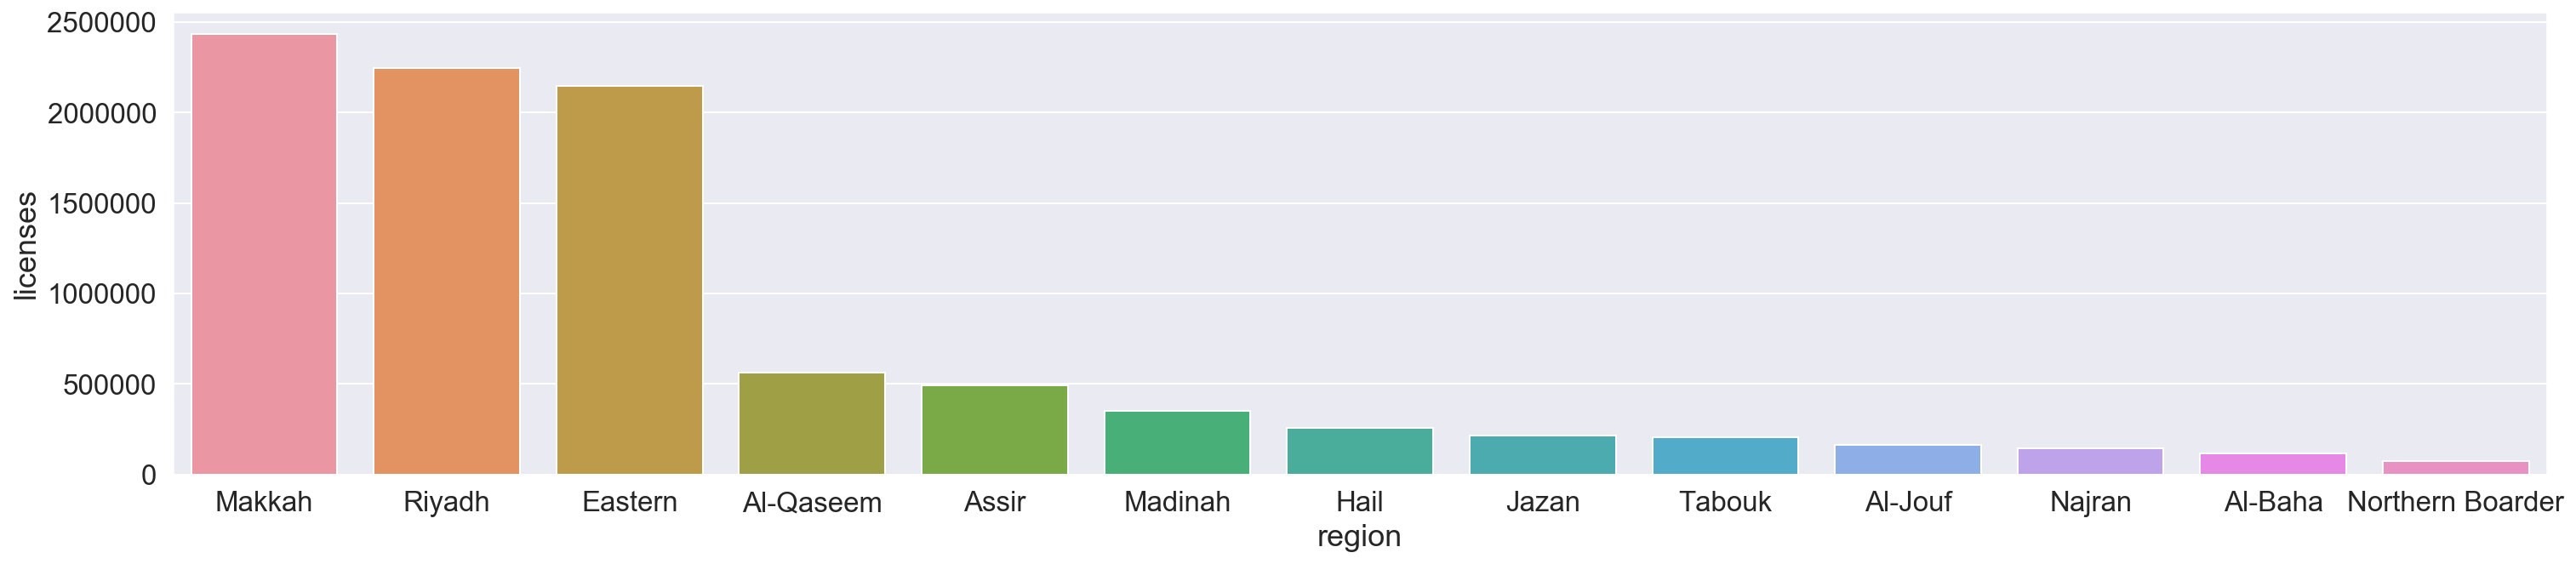

In [504]:
f = plt.figure(figsize=(25,5)) # plotting the dataframe to get better look
sns.barplot(combined_datasets.groupby(['region']).sum().sort_values(by = 'licenses', ascending= False).index,
           combined_datasets.groupby(['region']).sum().sort_values(by = 'licenses', ascending= False)['licenses'])

In [505]:
# We can clearly see that makkah has the highest sum of licenses while Northerner boarder has the lowest,
# this alone doesn't give insite, unlease when compared with the next graph.

In [506]:
a=combined_datasets[combined_datasets['year'] == 2016].groupby(['region']).mean().sort_values(by = 'No. of Accidents', ascending= False)

In [507]:
b=combined_datasets[combined_datasets['year'] == 2017].groupby(['region']).mean().sort_values(by = 'No. of Accidents', ascending= False)

In [508]:
pd.concat([a,b])

,year,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,licenses
region,,,,,
Riyadh,2016,141736.0,1430.0,4207.0,242851
Makkah,2016,134838.0,2243.0,12383.0,136055
Eastern,2016,101619.0,1113.0,4893.0,142307
Assir,2016,32684.0,983.0,2541.0,41367
Jazan,2016,25873.0,514.0,2259.0,11504
Al-Qaseem,2016,25664.0,397.0,1513.0,9180
Tabouk,2016,16031.0,434.0,1724.0,13610
Madinah,2016,14475.0,822.0,4184.0,24540
Northern Boarder,2016,13196.0,193.0,631.0,4958


In [509]:
# using groupby and masking we can calculate the mean of accidents for each region then sorting them

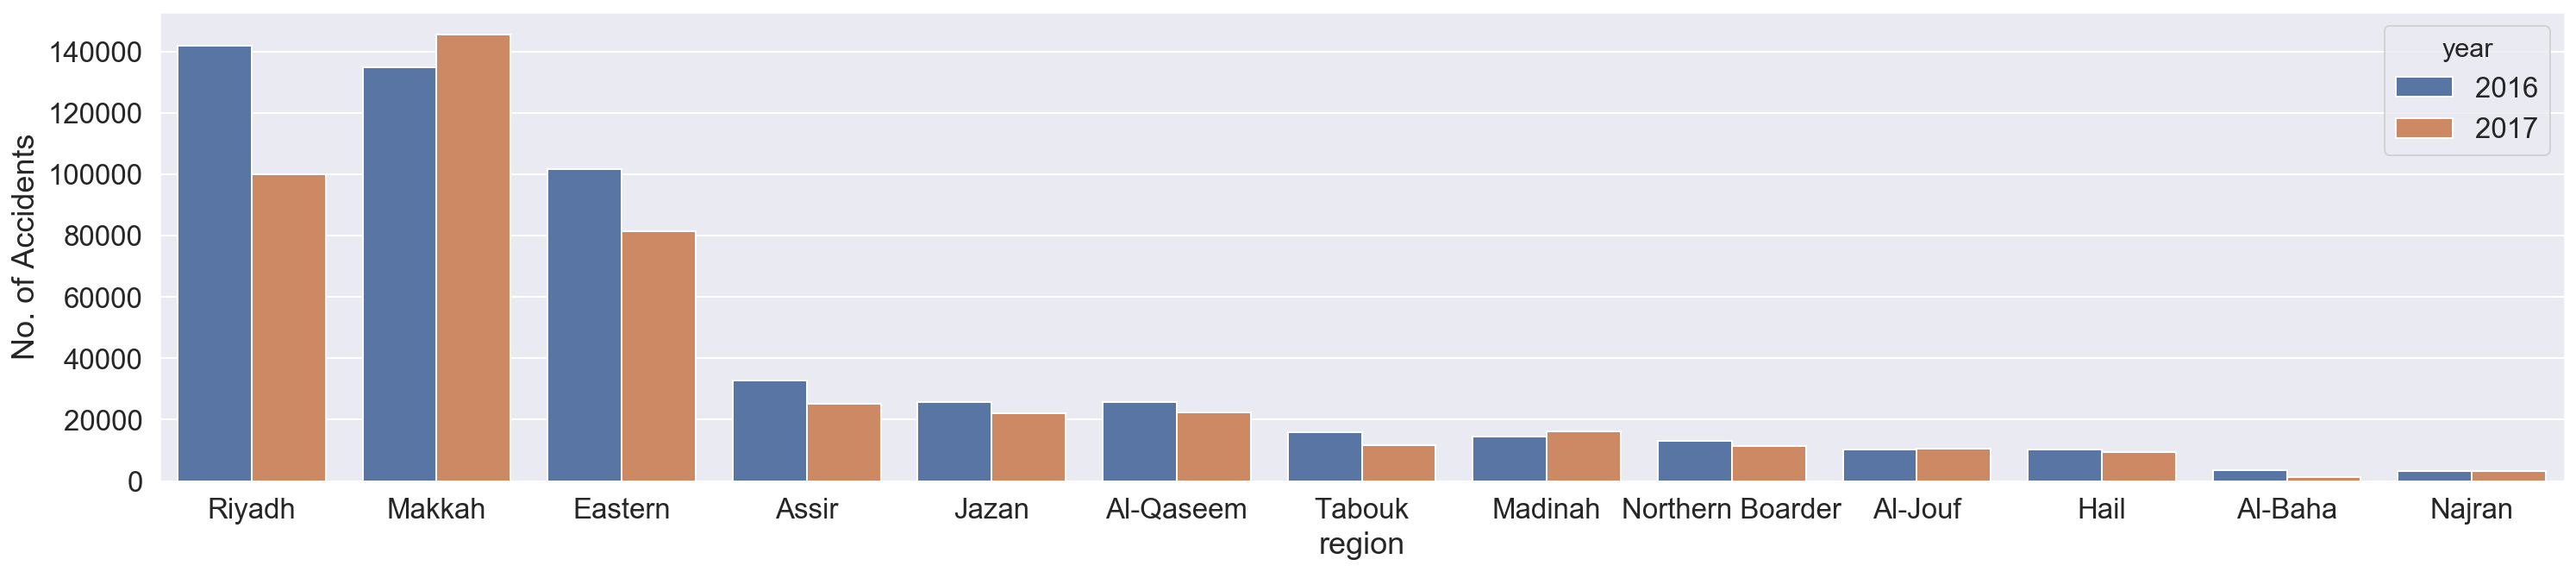

In [510]:
f  = plt.figure(figsize=(25,5))
sns.barplot(pd.concat([a,b]).index,
           pd.concat([a,b])['No. of Accidents'] ,
           hue=pd.concat([a,b]).year)

In [511]:
#  As we can see makkah has the highest mean of accidents(2017) while al baha has the lowest,
# interestingly the regions which have higher licenses also have higher accidents,
# which make sense because more drivers lead to more accidents. 

In [512]:
mean_Accidents_year= {k:v for (k,v) in zip(combined_datasets.year.unique()[:2],
                         ( i for i in 
                          (combined_datasets[combined_datasets['year'] == column_name].mean()['No. of Accidents'] for column_name in combined_datasets.year.unique())) )}
mean_Accidents_year # calculating the mean of accidents for each year using dict comprehonsion

{2016: 41029.230769230766, 2017: 35422.153846153844}

In [513]:
mean_Licenses_year= {k:v for (k,v) in zip(combined_datasets.year.unique(),
                         ( i for i in 
                          (combined_datasets[combined_datasets['year'] == column_name].mean()['licenses'] for column_name in combined_datasets.year.unique())) )}
mean_Licenses_year # calculating the mean of licenses for each year using dict comprehonsion

{2016: 53616.692307692305,
 2017: 71397.30769230769,
 1993: 22684.076923076922,
 1994: 23347.69230769231,
 1995: 19375.23076923077,
 1996: 18278.69230769231,
 1997: 22253.53846153846,
 1998: 26026.923076923078,
 1999: 25554.615384615383,
 2000: 21018.30769230769,
 2001: 20363.46153846154,
 2002: 21695.23076923077,
 2003: 19604.46153846154,
 2004: 20672.153846153848,
 2005: 19323.30769230769,
 2006: 20577.53846153846,
 2007: 25488.923076923078,
 2008: 25396.76923076923,
 2009: 28944.23076923077,
 2010: 29731.53846153846,
 2011: 30812.153846153848,
 2012: 31631.076923076922,
 2013: 43485.692307692305,
 2014: 48108.769230769234,
 2015: 33495.307692307695}

In [514]:
def liceses_than_avg(year_avg , year): # made a function that take year and year avg then return the regions thats have higher licenses than the year avg 
     return combined_datasets[(combined_datasets['licenses'] >= year_avg) & (combined_datasets['year'] == year)][['region']]

In [515]:
def Accidents_than_avg(year_avg , year): # made a function that take year and year avg then return the regions thats have higher accidents than the year avg
     return combined_datasets[(combined_datasets['No. of Accidents'] >= year_avg) & (combined_datasets['year'] == year)][['region']]

In [516]:
# 
higher_avg= {k:v for (k,v) in zip(combined_datasets.year.unique(),
                         (i for i in
                          (liceses_than_avg(year_avg , year) for year , year_avg in
                           zip(mean_Licenses_year.keys(),mean_Licenses_year.values()))))}
higher_avg # a dict that have keys as the years and regions that have higher avg than the year avg as values 

{2016:      region
 4   Eastern
 5      Hail
 8    Makkah
 11   Riyadh, 2017:      region
 17  Eastern
 21   Makkah
 24   Riyadh, 1993:        region
 28  Al-Qaseem
 34     Makkah
 37     Riyadh, 1994:        region
 41  Al-Qaseem
 47     Makkah
 50     Riyadh, 1995:        region
 54  Al-Qaseem
 60     Makkah
 63     Riyadh, 1996:        region
 67  Al-Qaseem
 73     Makkah
 76     Riyadh, 1997:      region
 82  Eastern
 86   Makkah
 89   Riyadh, 1998:       region
 95   Eastern
 99    Makkah
 102   Riyadh, 1999:       region
 108  Eastern
 112   Makkah
 115   Riyadh, 2000:       region
 121  Eastern
 125   Makkah
 128   Riyadh, 2001:       region
 134  Eastern
 138   Makkah, 2002:       region
 147  Eastern
 151   Makkah
 154   Riyadh, 2003:       region
 160  Eastern
 164   Makkah
 167   Riyadh, 2004:       region
 173  Eastern
 177   Makkah
 180   Riyadh, 2005:       region
 186  Eastern
 190   Makkah
 193   Riyadh, 2006:       region
 199  Eastern
 203   Makkah
 206   Riyadh, 2007

In [517]:
higher_avg= {k:v for (k,v) in zip(combined_datasets.year.unique()[:2],
                         (i for i in
                          (Accidents_than_avg(year_avg , year) for year , year_avg in
                           zip(mean_Licenses_year.keys(),mean_Licenses_year.values()))))}
higher_avg # a dict that have keys as the years and regions that have higher avg than the year avg as values 

{2016:      region
 4   Eastern
 8    Makkah
 11   Riyadh, 2017:      region
 17  Eastern
 21   Makkah
 24   Riyadh}

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

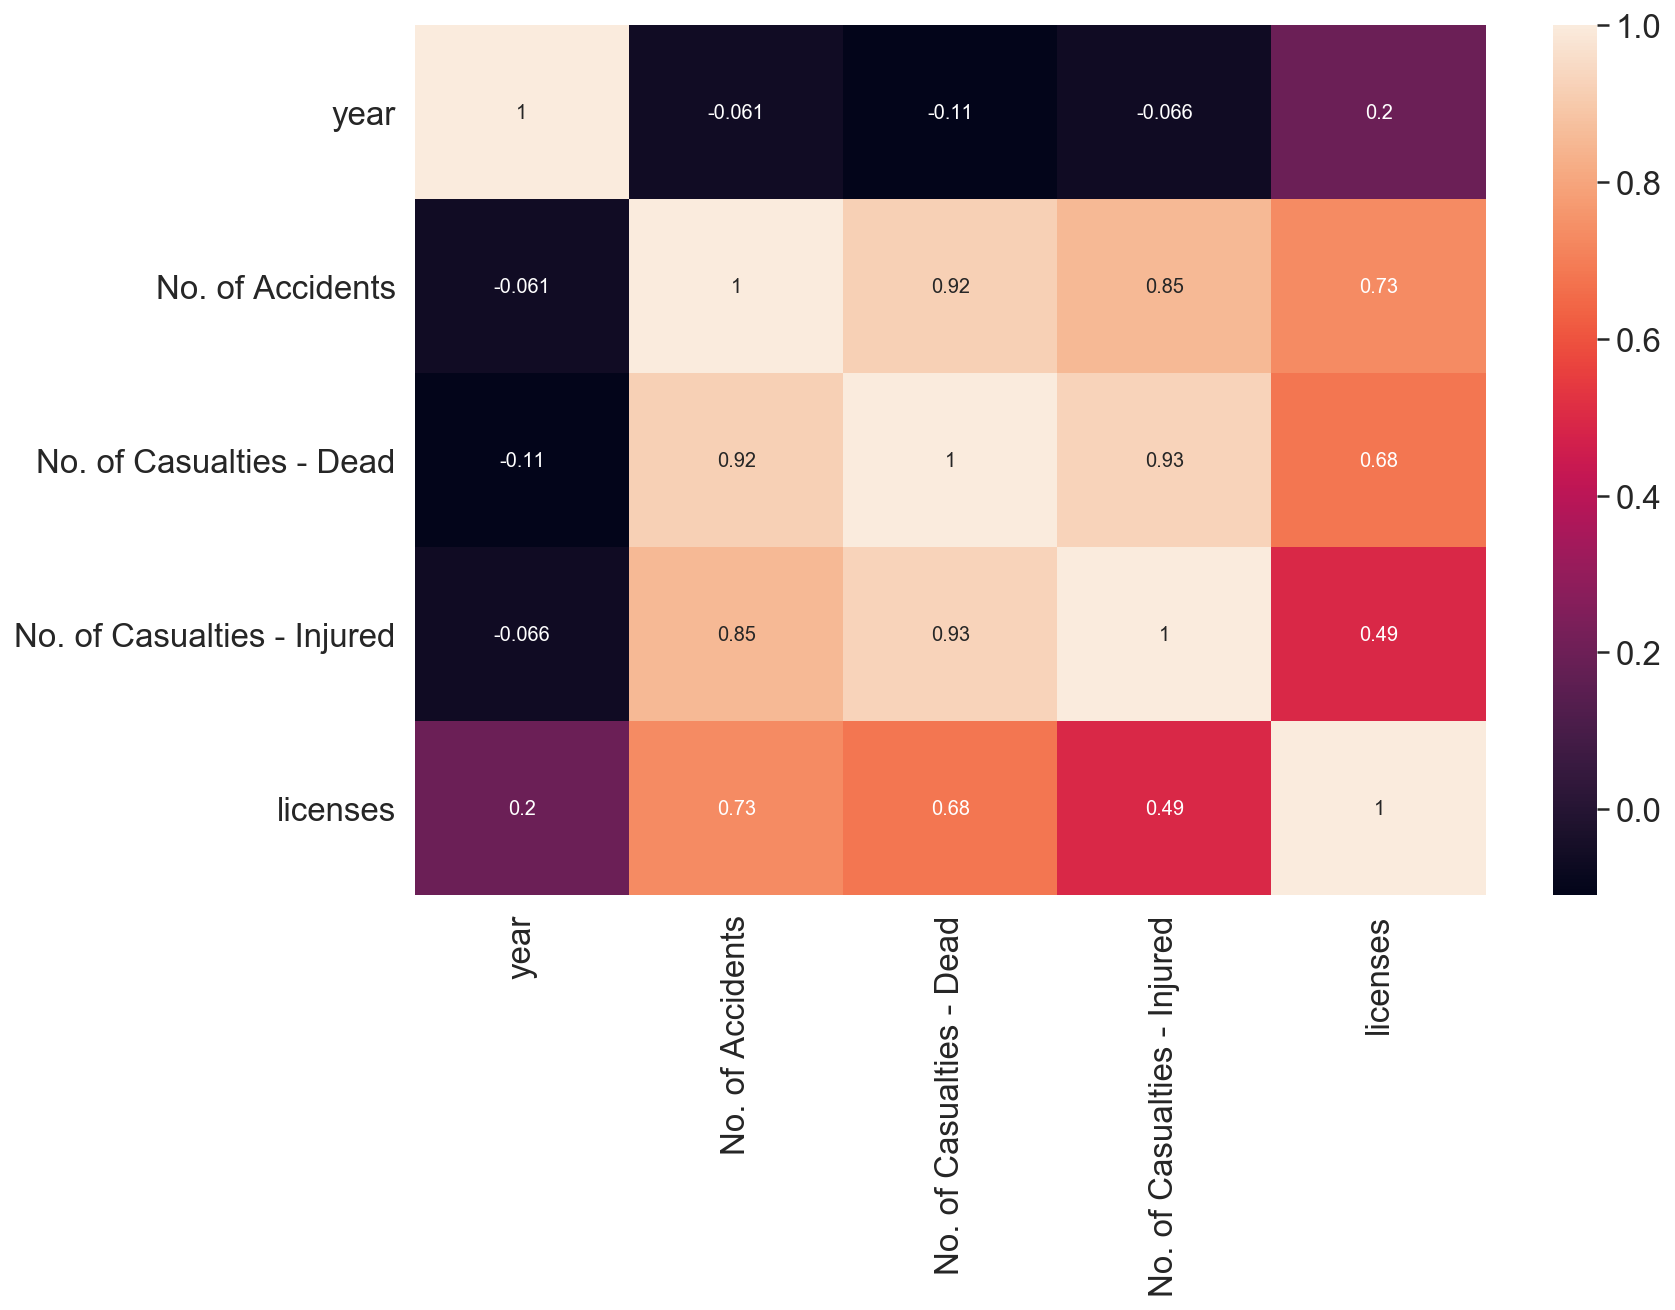

In [518]:
f = plt.figure(figsize=(12,8))
sns.heatmap(combined_datasets.corr(), annot=True) # heatmap for dataframe to show correlation

In [519]:
# By getting Pearson correlation and using heat map
# we can see that the accidents have high correlation with the number of licenses and that make sense,
# as we saw before the regions which have high more licenses tends to have more accidents.

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [520]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles): # function that take columns names and datframe and plot hist foe all columns
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
#         ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_title(list_of_titles[i])
        # Set titles, labels, etc here for each subplot
    return plt.tight_layout()

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

In [521]:
combined_datasets.columns

Index(['year', 'region', 'latitude', 'longitude', 'No. of Accidents',
       'No. of Casualties - Dead', 'No. of Casualties - Injured', 'licenses'],
      dtype='object')

C:\Users\Satoshi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Satoshi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


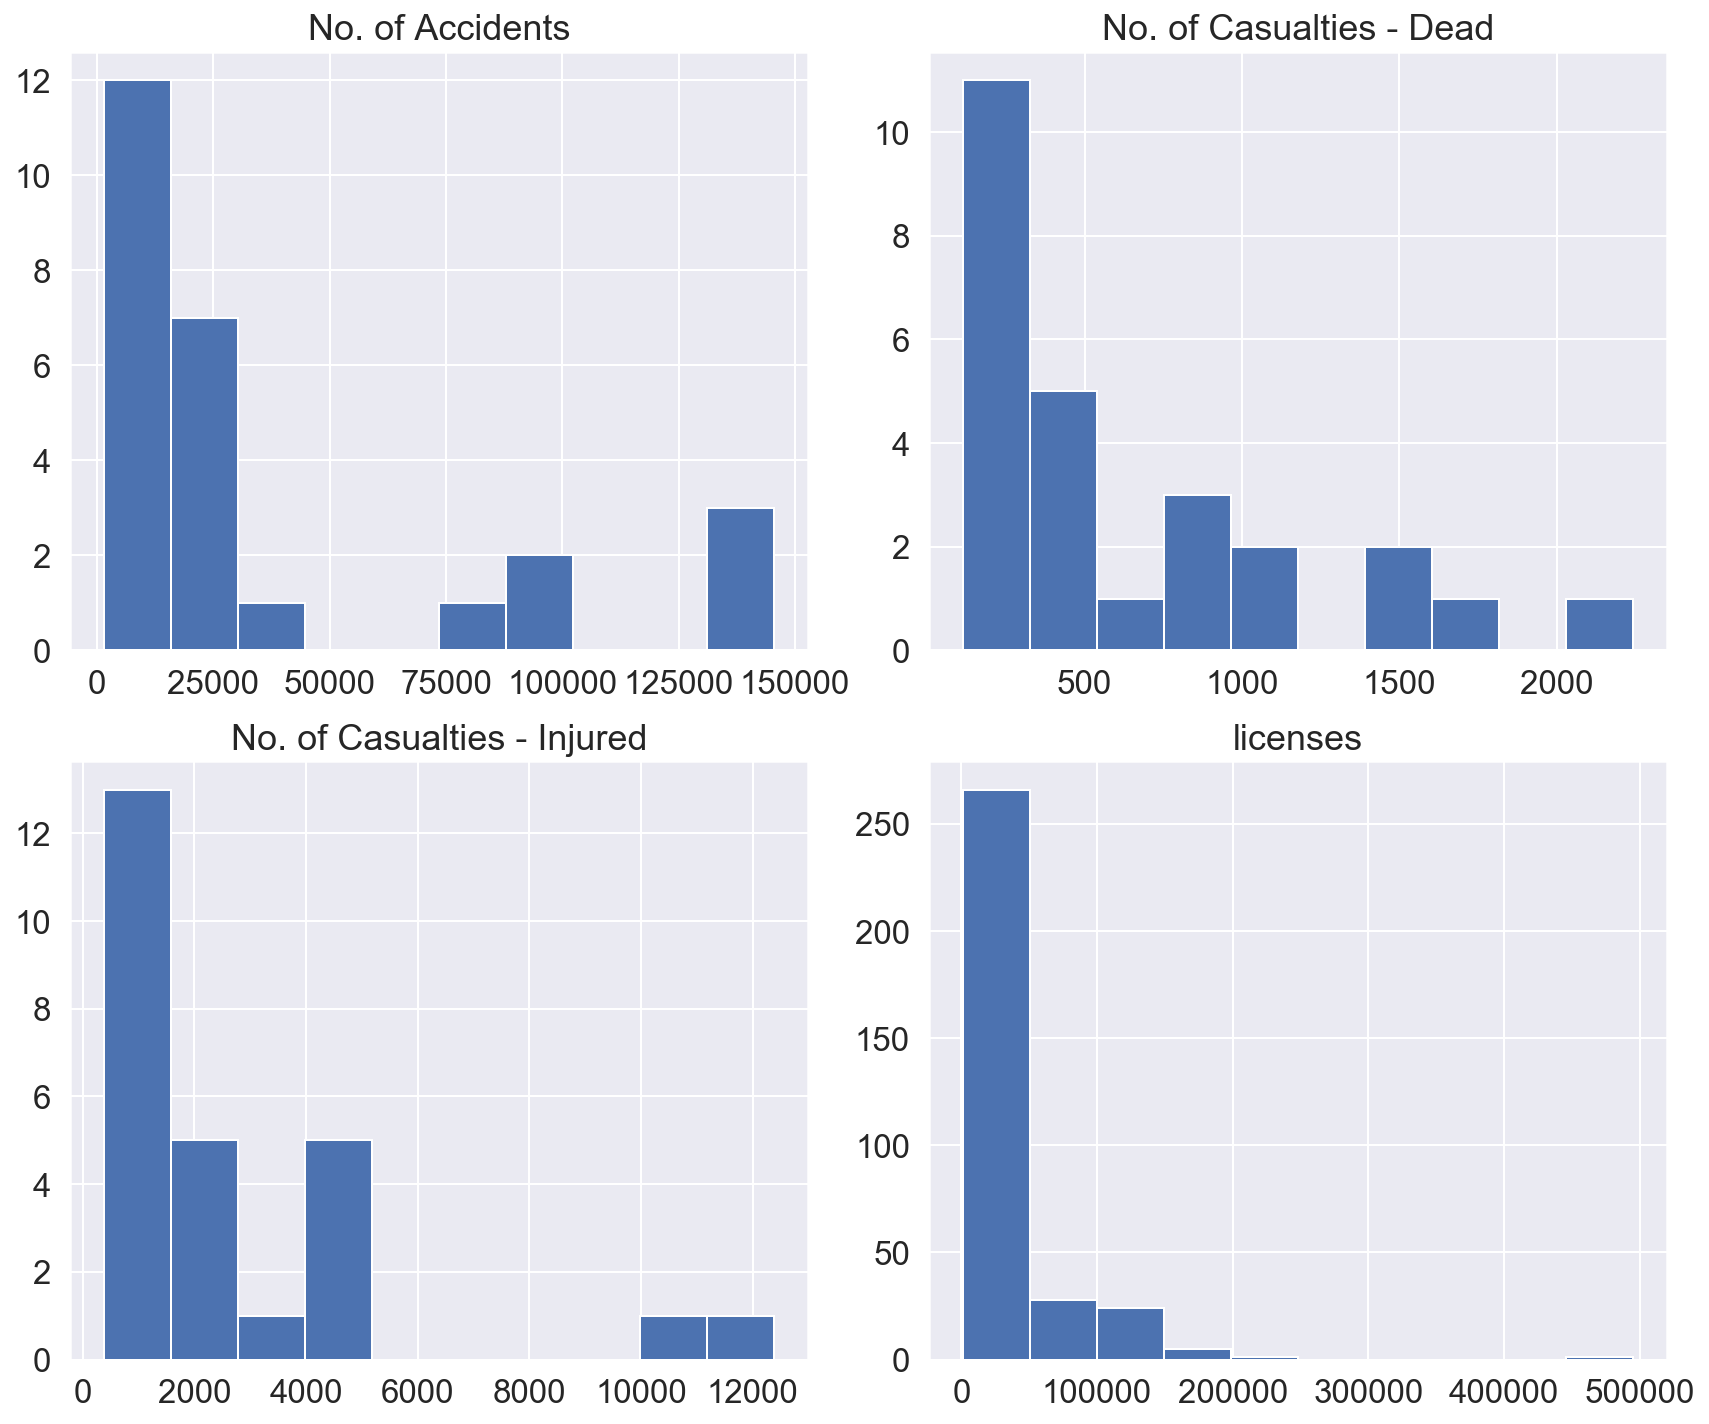

In [522]:
# Code
subplot_histograms(combined_datasets, ['No. of Accidents',
       'No. of Casualties - Dead', 'No. of Casualties - Injured',
       'licenses']
                   , ['No. of Accidents',
       'No. of Casualties - Dead', 'No. of Casualties - Injured',
       'licenses']
                   ) # ploting hist for the numerical columns

In [523]:
# We can see the 4 variables don't have a normal dist, and almost all of them skewd to the right

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0.5, 1.0, 'licenses VS accidents_2017')

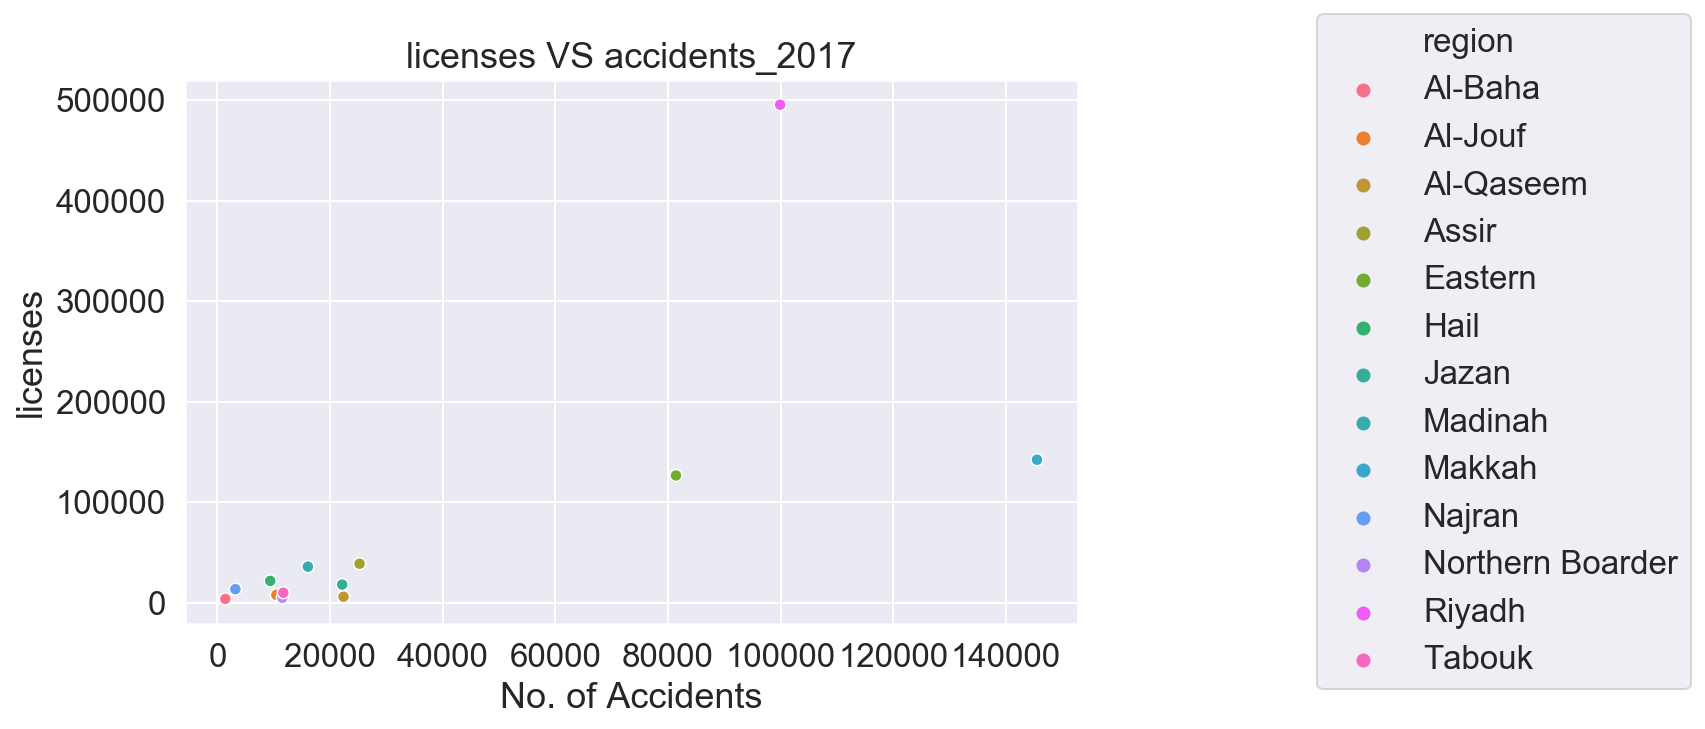

In [524]:
fig , ax = plt.subplots(figsize=(8,5))
sns.scatterplot(combined_datasets[combined_datasets['year'] == 2017]['No. of Accidents']
                , combined_datasets['licenses'] , hue=combined_datasets['region'])
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1) # this will move the legend outside the ax
ax.set_title('licenses VS accidents_2017')

Text(0.5, 1.0, 'licenses VS accidents_2016')

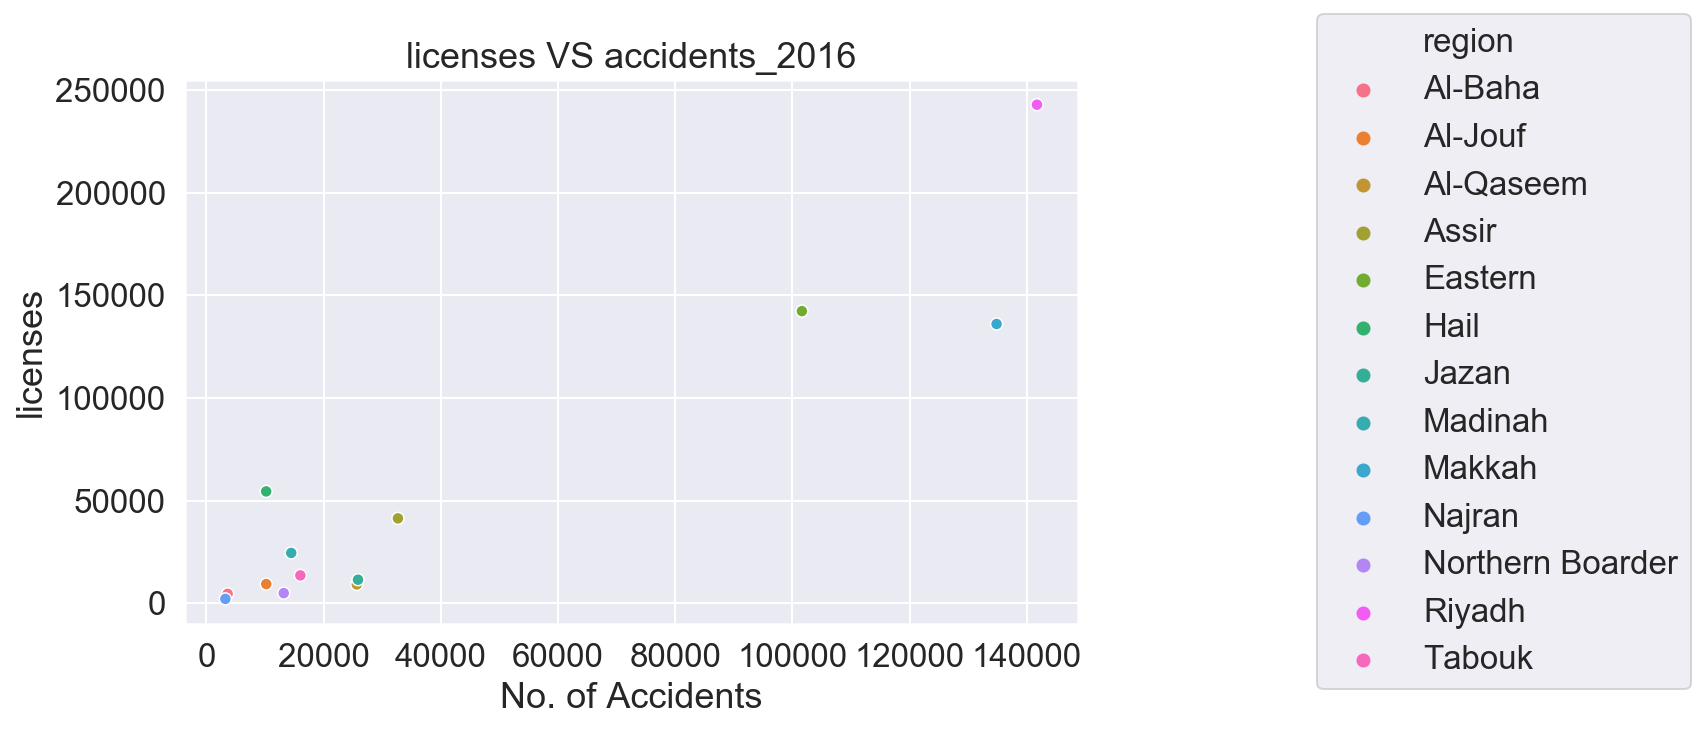

In [525]:
fig , ax = plt.subplots(figsize=(8,5))
sns.scatterplot(combined_datasets[combined_datasets['year'] == 2016]['No. of Accidents'] ,
                combined_datasets['licenses'] , hue= combined_datasets.region)
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
ax.set_title('licenses VS accidents_2016')

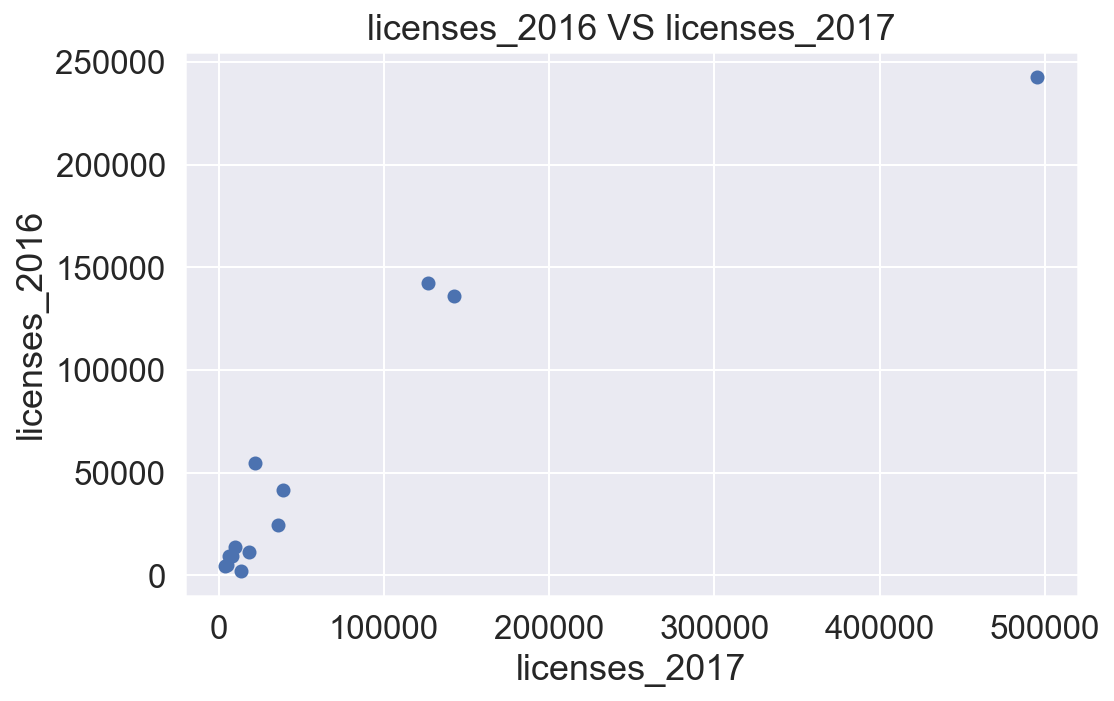

In [526]:
fig , ax = plt.subplots(figsize=(8,5))
plt.scatter(combined_datasets[combined_datasets['year'] == 2017]['licenses'] ,
                combined_datasets[combined_datasets['year'] == 2016]['licenses'])
ax.set_title('licenses_2016 VS licenses_2017')
ax.set_xlabel('licenses_2017')
ax.set_ylabel('licenses_2016')
plt.show()

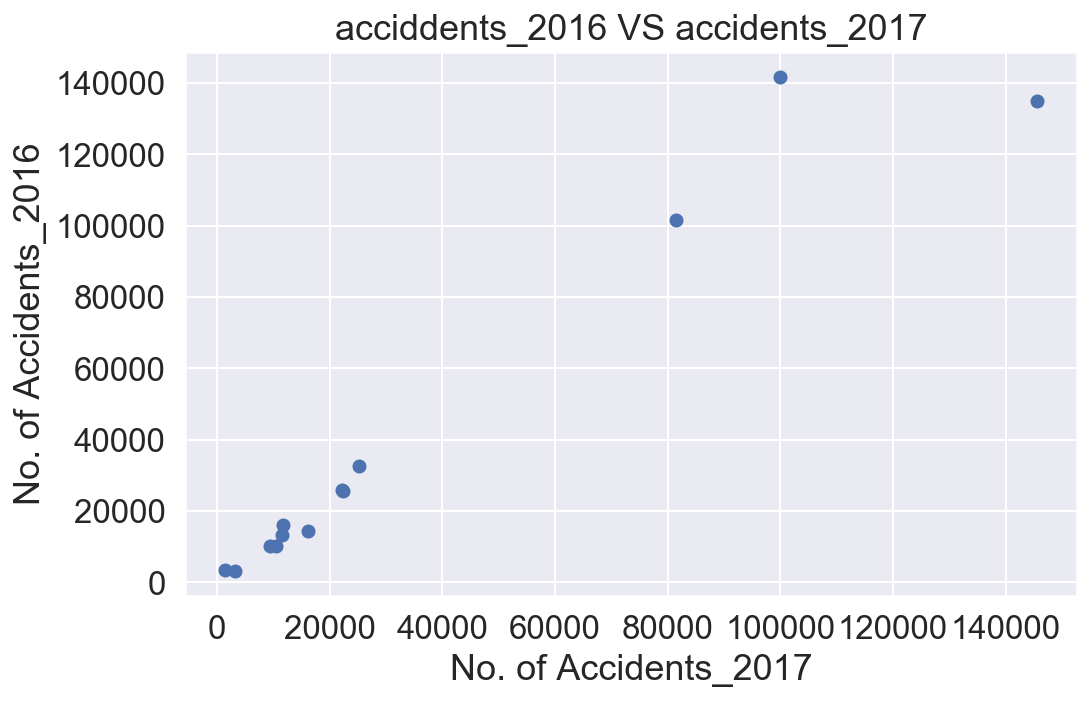

In [527]:
fig , ax = plt.subplots(figsize=(8,5))
plt.scatter(combined_datasets[combined_datasets['year'] == 2017]['No. of Accidents'] ,
                combined_datasets[combined_datasets['year'] == 2016]['No. of Accidents'] )
ax.set_title('acciddents_2016 VS accidents_2017')
ax.set_xlabel('No. of Accidents_2017')
ax.set_ylabel('No. of Accidents_2016')
plt.show()

In [528]:
# For the scatterplots between accidents and licinses it make sense
# that with increase of drivers it will lead to increase in accidents.

# As for the scatterplot for the same variables for different years it make sense
# that there is increase in the years due to inflation.

# From scatter plot we can observe the trend that follow licenses and accidents,
# we see that they have some correlation and increase together for each region,
# except Riyadh have a sudden drop, which need additional plots to investigate.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [529]:
from sklearn.preprocessing import StandardScaler # importing standard scaler

s = StandardScaler() # initiate scaler

In [530]:
combined_datasets.columns

Index(['year', 'region', 'latitude', 'longitude', 'No. of Accidents',
       'No. of Casualties - Dead', 'No. of Casualties - Injured', 'licenses'],
      dtype='object')

In [531]:
combined_datasets_stand = pd.DataFrame(s.fit_transform(combined_datasets[[ 'No. of Accidents',
       'No. of Casualties - Dead', 'No. of Casualties - Injured',
       'licenses']]) ,columns=[ 'No. of Accidents',
       'No. of Casualties - Dead', 'No. of Casualties - Injured',
       'licenses']) # creat a standard version of the dataframe so that we can observe the bosplots

In [532]:
combined_datasets_stand.head()

,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,licenses
0,-0.759093,-0.835427,-0.528995,-0.513271
1,-0.614459,-0.724132,-0.636117,-0.412798
2,-0.275531,-0.442184,-0.429200,-0.416832
3,-0.121553,0.644799,-0.070498,0.262992
4,1.390484,0.885938,0.750191,2.394955


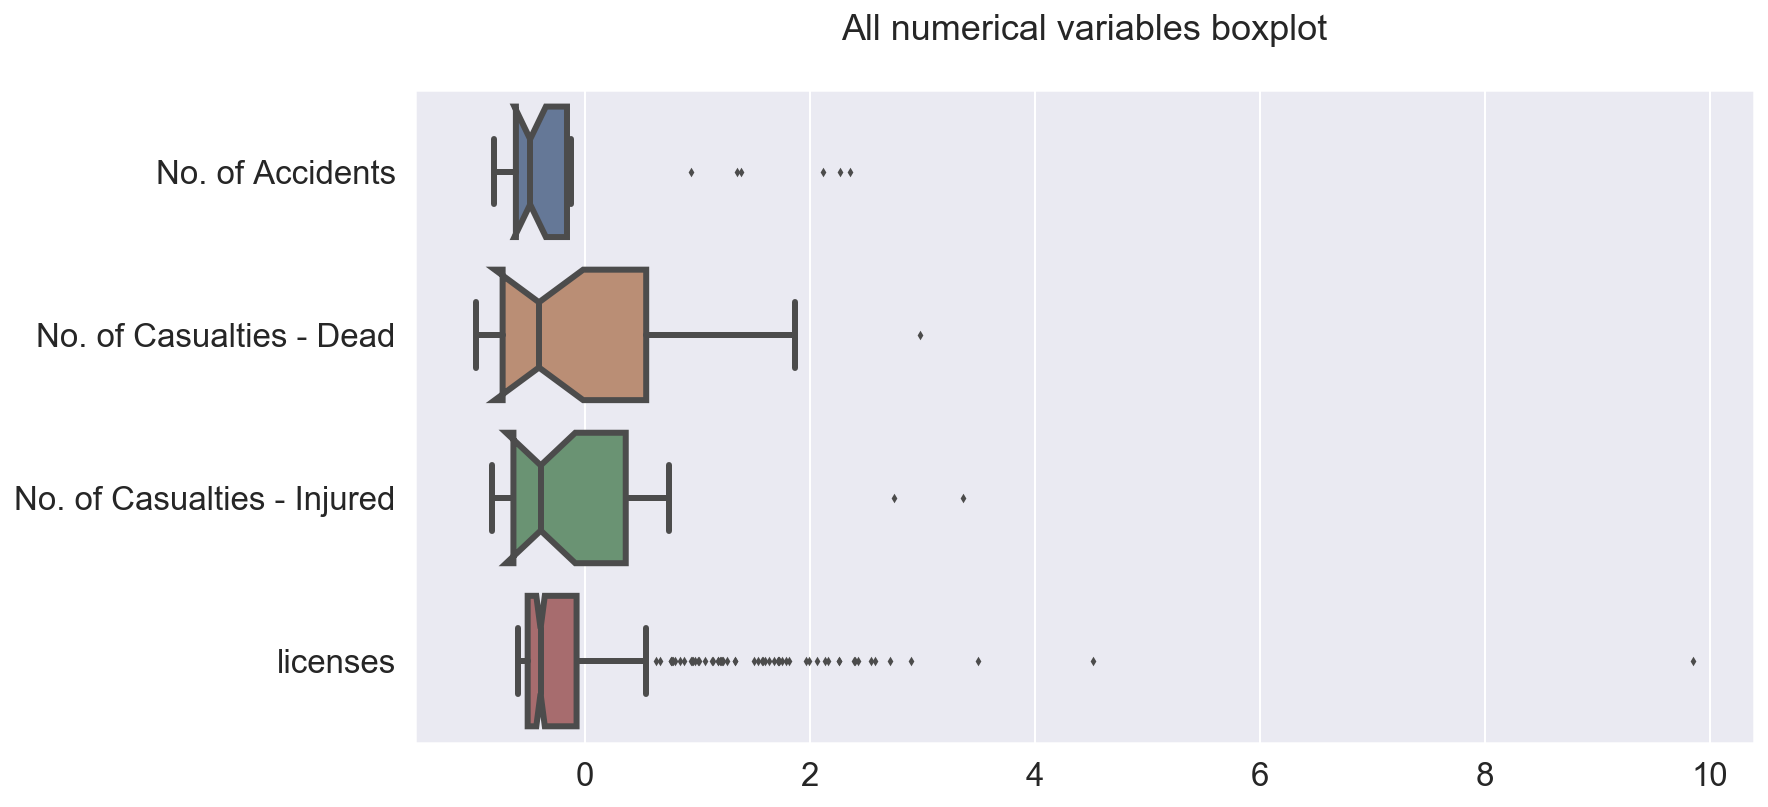

In [533]:
# Code
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

sns.boxplot(data=combined_datasets_stand, orient='h', fliersize=2, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('All numerical variables boxplot\n')
plt.show() # plotting boxplot for all numerical columns

In [534]:
# After scaling the numeric variables
# we can see the boxplots clearly and notice that there is alot of outliers in issued_liceses,
# while there is a bit of outlier in no. of accidents.

# Plotting box plot for all numerical values in the data set after scaling so we can see different
# scaled data in one plot, box plot give us idea about the outliers,
# we can clearly see a lot of outliers in licenses, and some on accidents,
# this suggest each region have different number of drivers which make sense.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

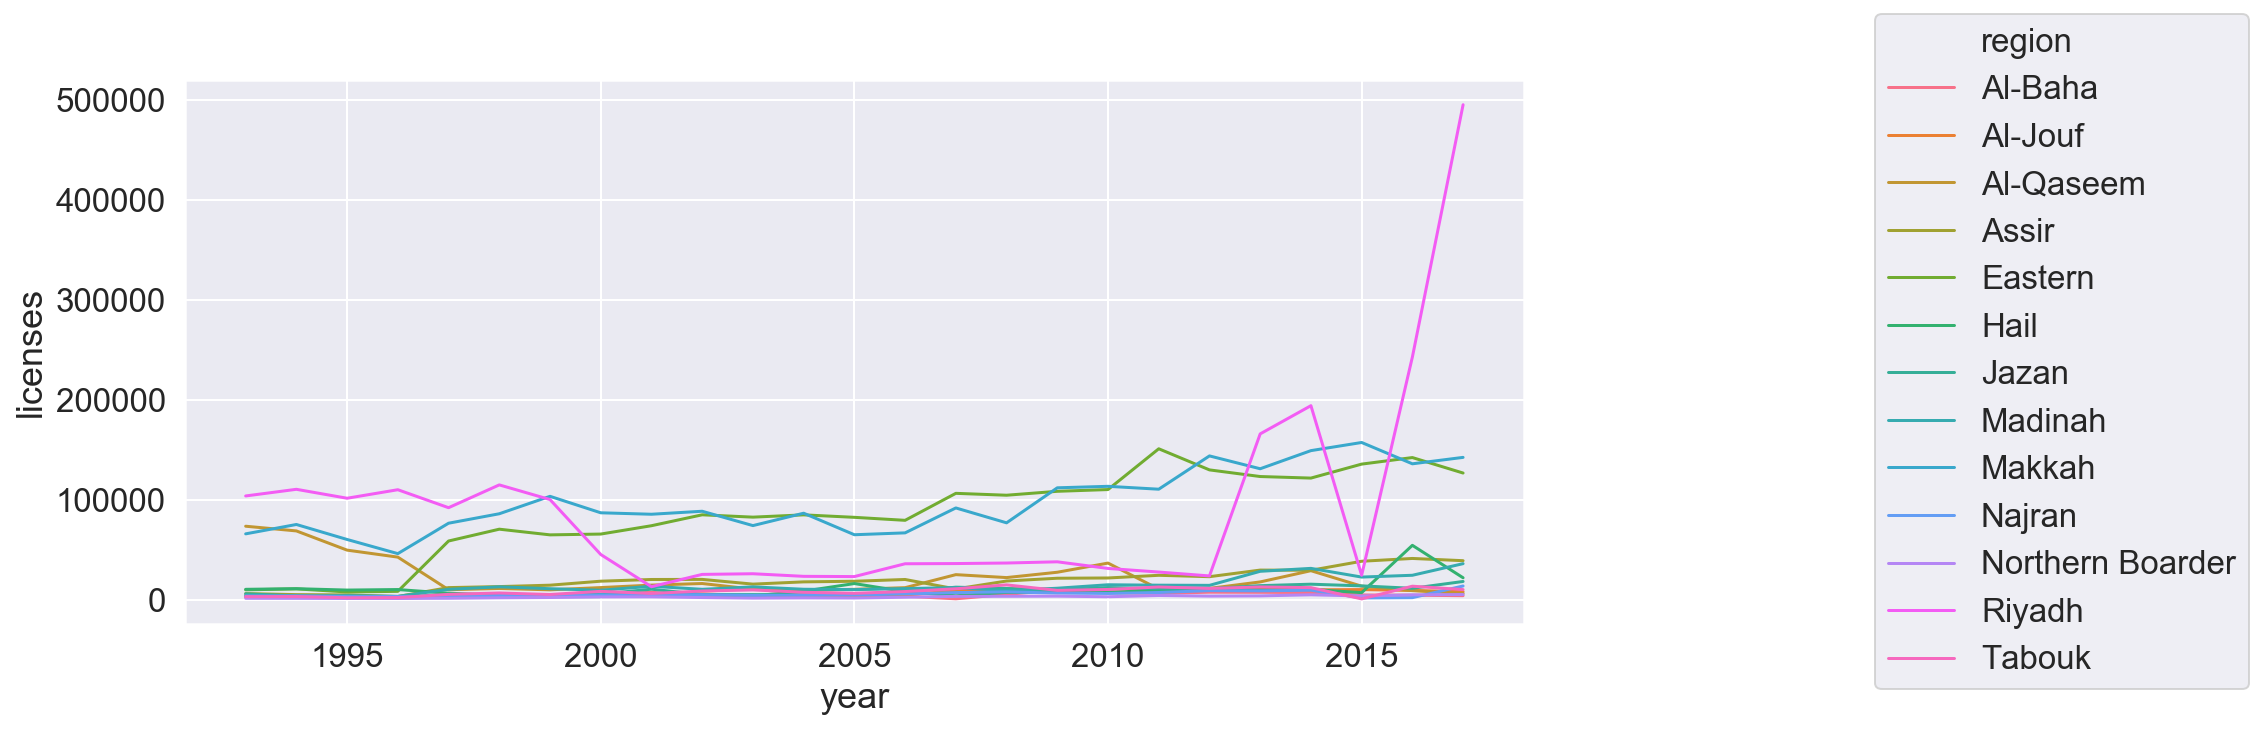

In [535]:
fig , ax = plt.subplots(figsize=(12,5))
sns.lineplot(combined_datasets.year,
           combined_datasets['licenses'] , hue= combined_datasets.region )
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [536]:
# As we can see there is increase in licenses  for each region result from inflation,
# which needed to be controlled by any means so that it will not increase numbers of accidents.

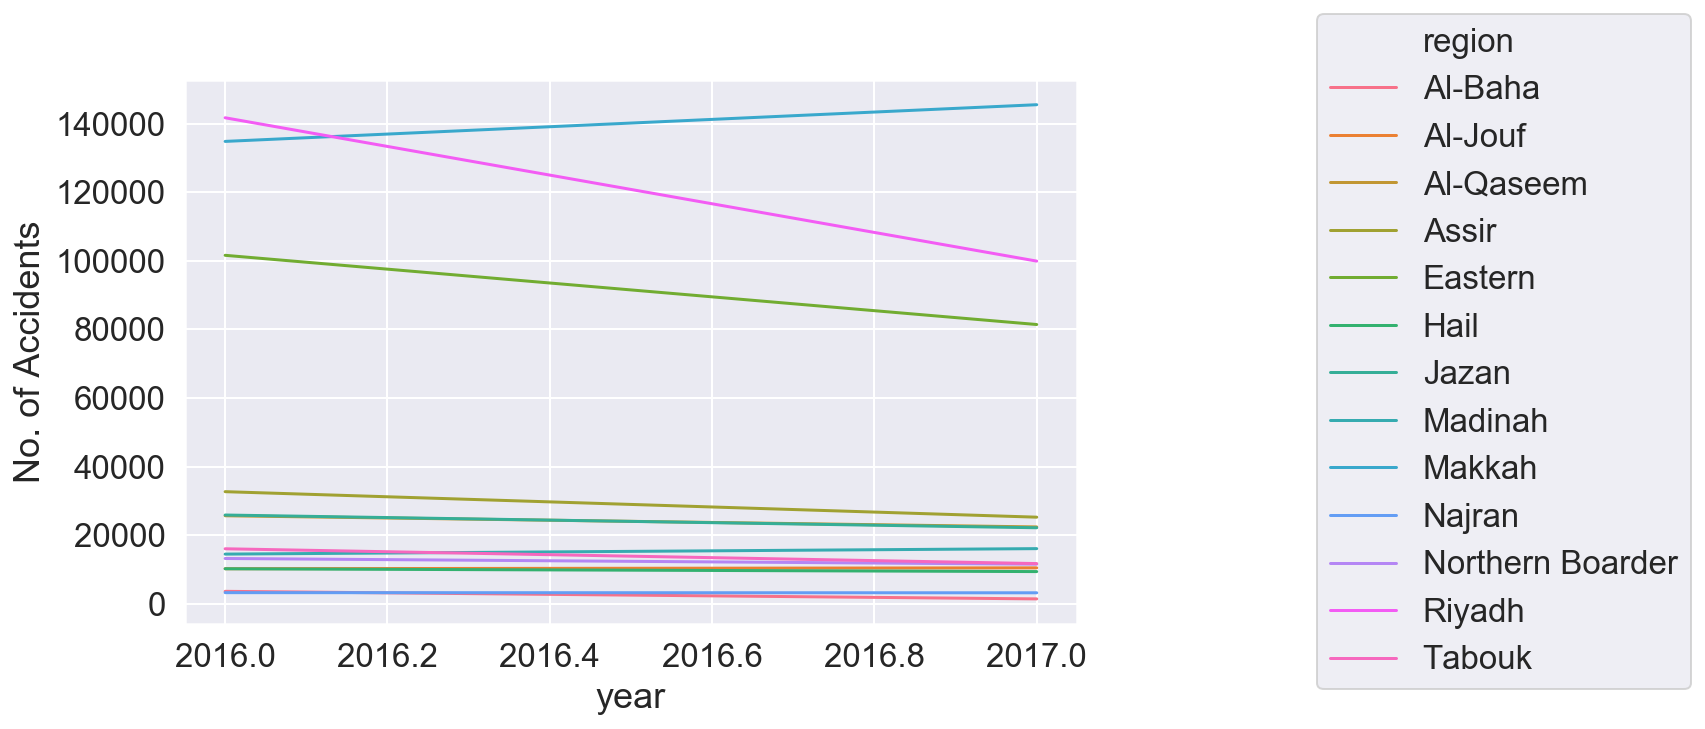

In [537]:
fig , ax = plt.subplots(figsize=(8,5))
sns.lineplot(combined_datasets.year,
           combined_datasets['No. of Accidents'].dropna() , hue= combined_datasets.region )
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [538]:
#  Interestingly with huge increase in licenses for Riyadh ,
# there is decrease in accidents while there are high correlation between them why is that?
# we need to do some outside research to look for reasons.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

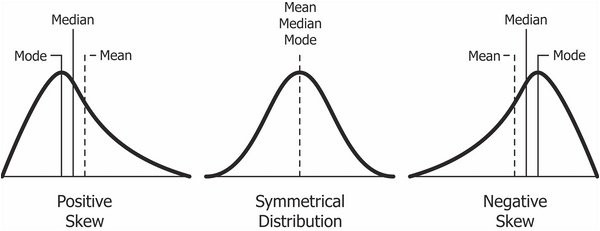
### source : https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

In [539]:
combined_datasets.describe().iloc[:,1:]

,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,licenses
count,26.000000,26.000000,26.000000,325.000000
mean,38225.692308,635.384615,2743.038462,28915.347692
std,46493.705035,549.783381,2922.641127,47419.058819
min,1414.000000,112.000000,374.000000,915.000000
25%,10276.250000,241.250000,923.000000,4846.000000
50%,16050.500000,415.500000,1618.500000,10267.000000
75%,30981.250000,929.250000,3784.000000,25423.000000
max,145541.000000,2243.000000,12383.000000,495307.000000


In [540]:
# # Answers:
#  For No. of Accidents, No. of Casualties - Dead, No. of Casualties - Injured and issued_liceses :
#  Because the median is less than the mean we can say that this is positive skewd,
#  as the hist show, so stats and hist show the same thing.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

C:\Users\Satoshi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Satoshi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


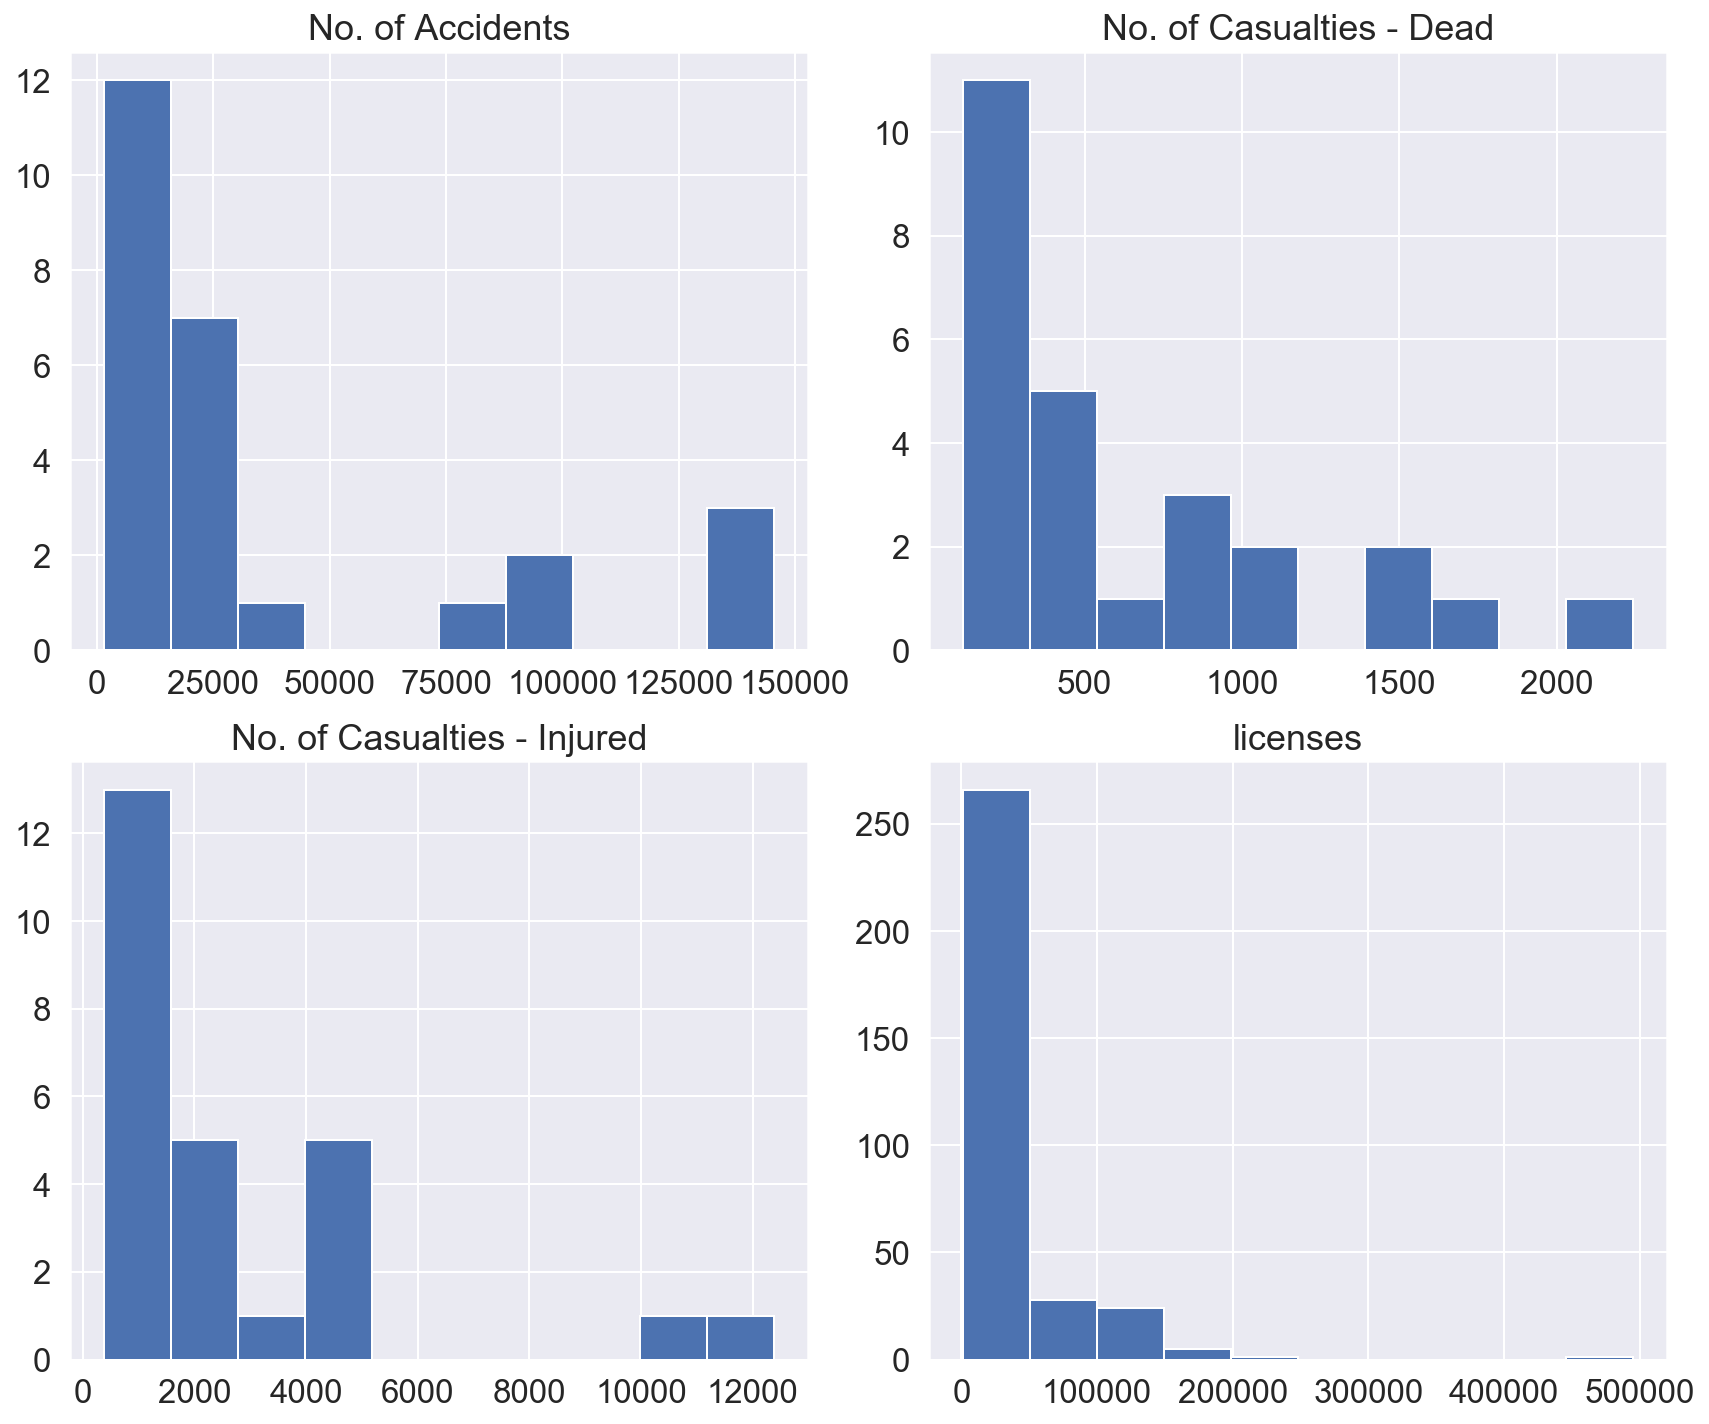

In [541]:
# Code
subplot_histograms(combined_datasets, ['No. of Accidents',
       'No. of Casualties - Dead', 'No. of Casualties - Injured',
       'licenses']
                   , ['No. of Accidents',
       'No. of Casualties - Dead', 'No. of Casualties - Injured',
       'licenses']
                   )

In [542]:
# Answer: 
# as we can see from the hist plots for the numerical variables there are not normally ditribution

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

In [543]:
# Answer:
# by observing the hist plots we can say all the numerical values are skewed to the right.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [544]:
# Code
from scipy.stats import normaltest, skew

# Your code here
numeric_columns = ['No. of Accidents',
       'No. of Casualties - Dead', 'No. of Casualties - Injured',
       'licenses']
for i in numeric_columns:
    if normaltest(combined_datasets[i].dropna())[1]<0.01: # null hypothesis: df[i] comes from a normal distribution
             print("The null hypothesis can be rejected for the {} feature ".format(i))
    else:
             print("The null hypothesis cannot be rejected for the {} feature ".format(i))

The null hypothesis can be rejected for the No. of Accidents feature 
The null hypothesis can be rejected for the No. of Casualties - Dead feature 
The null hypothesis can be rejected for the No. of Casualties - Injured feature 
The null hypothesis can be rejected for the licenses feature 


In [545]:
for i in numeric_columns:
    if skew(combined_datasets[i].dropna())>0: # ckecking all columns and see the skweness
             print("distribution is skewed positive for the {} feature ".format(i))
    elif skew(combined_datasets[i].dropna())<0:
             print("distribution is skewed negative for the {} feature ".format(i))
    else:
             print("no skeweness for the {} feature ".format(i)) 

distribution is skewed positive for the No. of Accidents feature 
distribution is skewed positive for the No. of Casualties - Dead feature 
distribution is skewed positive for the No. of Casualties - Injured feature 
distribution is skewed positive for the licenses feature 


## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Text(0.5, 1.0, 'accidents VS year')

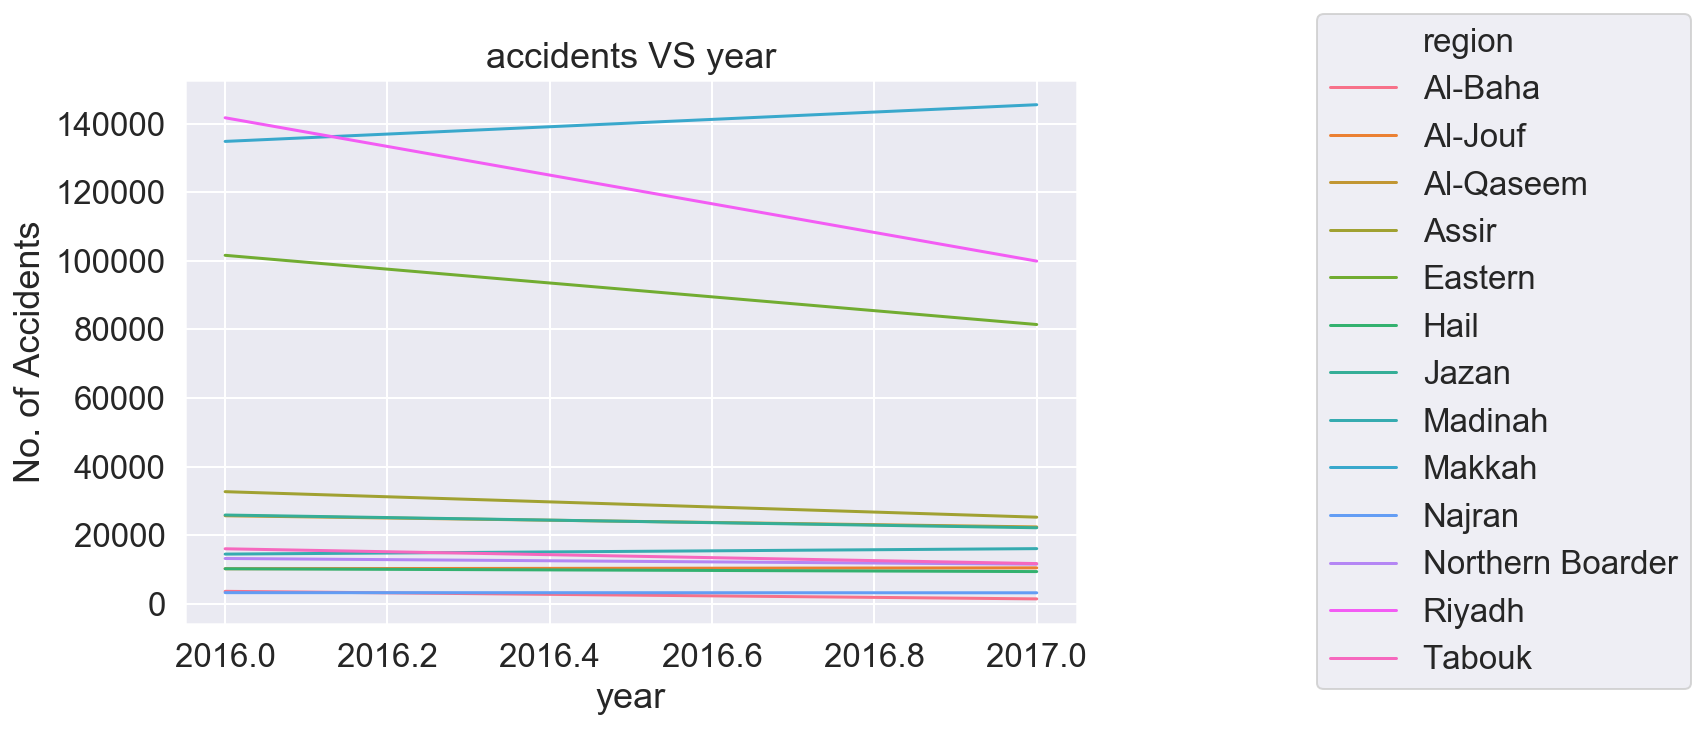

In [546]:
fig , ax = plt.subplots(figsize=(8,5))
sns.lineplot(combined_datasets.year,
           combined_datasets['No. of Accidents'].dropna() , hue= combined_datasets.region )
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
ax.set_title('accidents VS year')

Text(0.5, 1.0, 'licenses VS year')

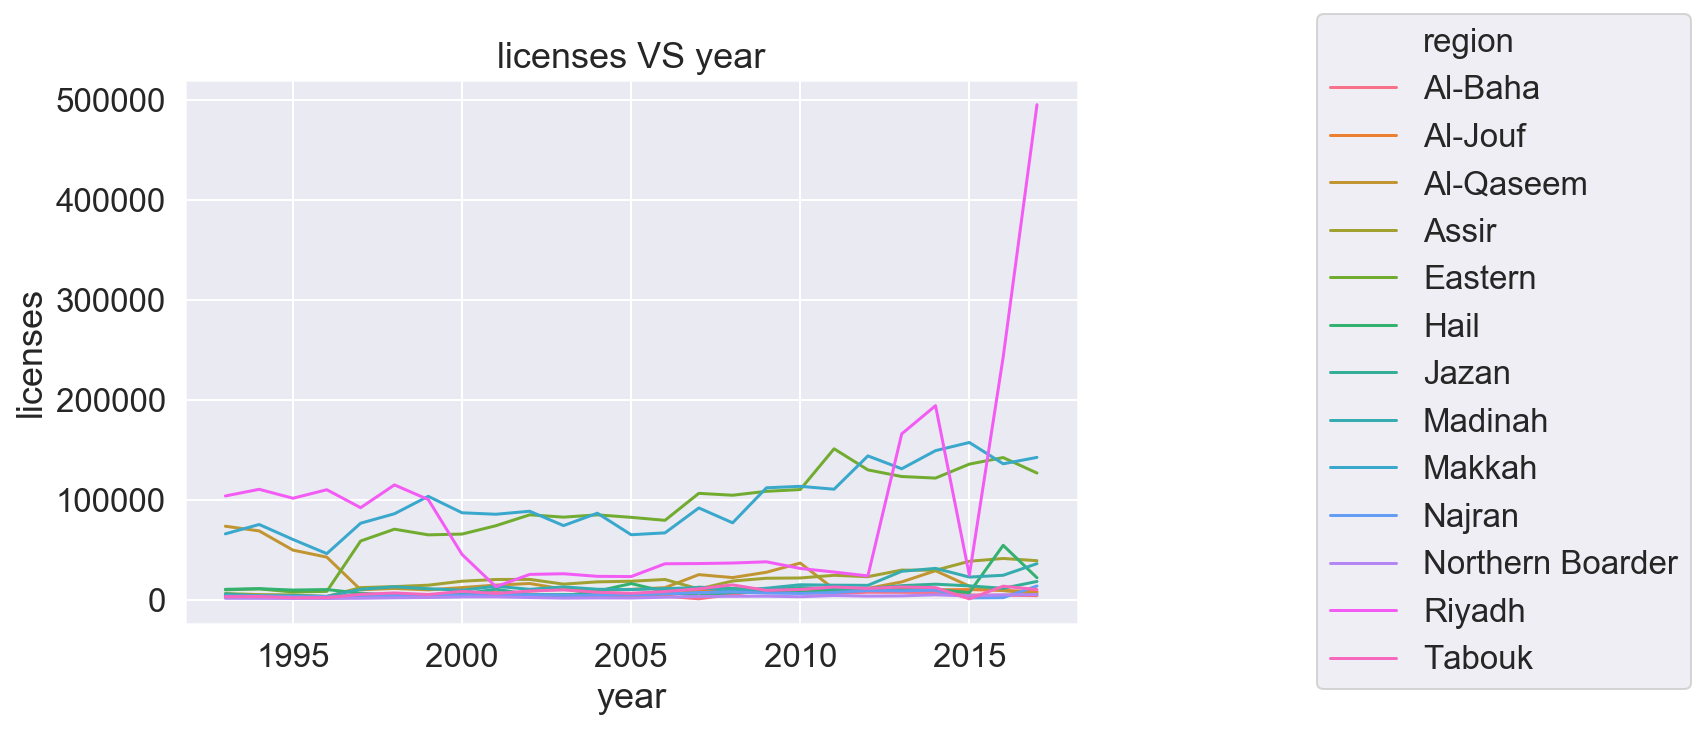

In [547]:
fig , ax = plt.subplots(figsize=(8,5))
sns.lineplot(combined_datasets.year,
           combined_datasets['licenses'].dropna() , hue= combined_datasets.region )
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
ax.set_title('licenses VS year')

Text(0.5, 1.0, 'licenses VS accidents')

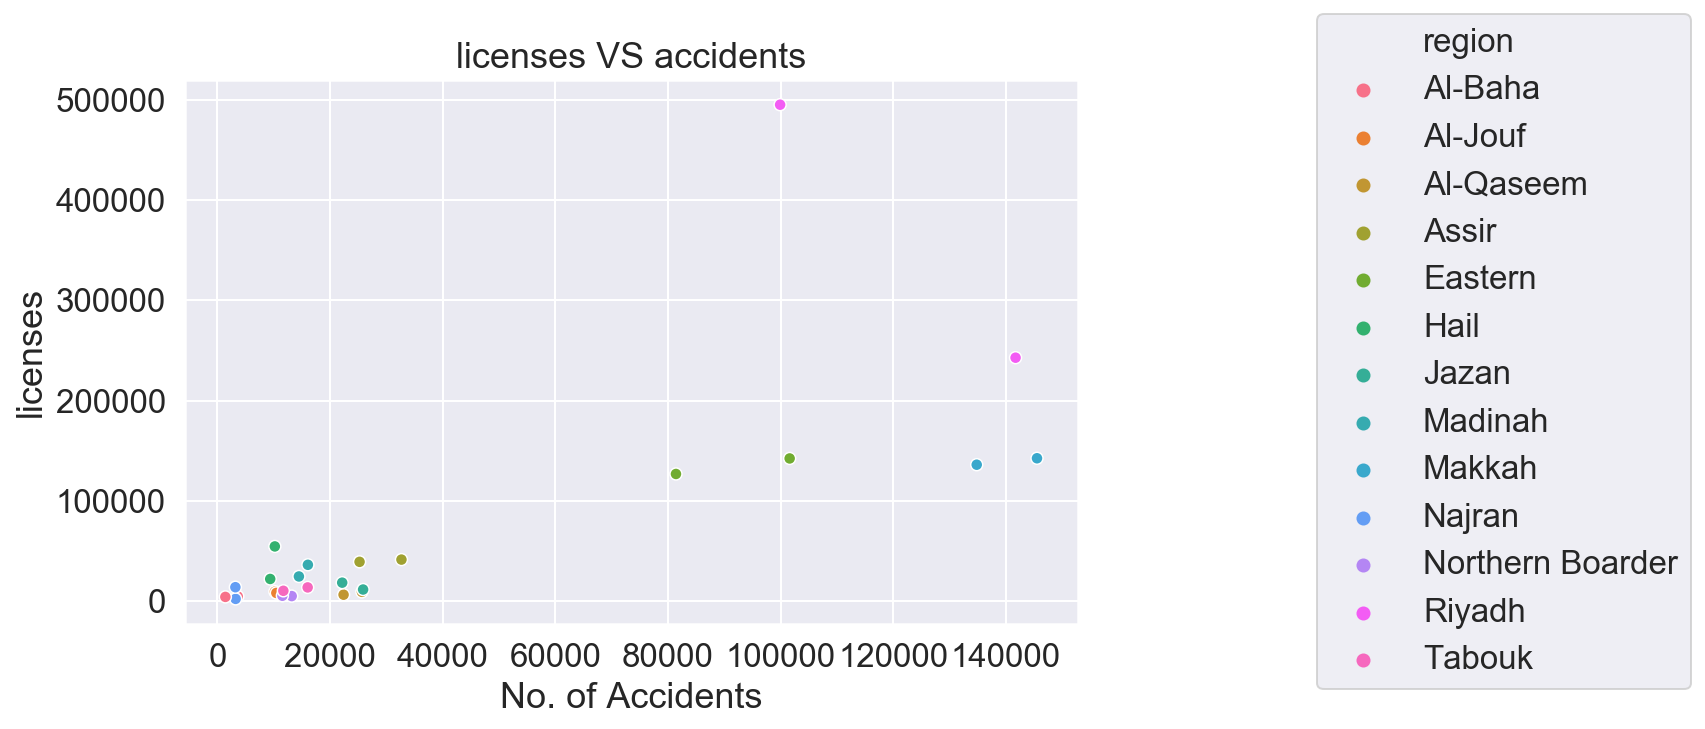

In [548]:
fig , ax = plt.subplots(figsize=(8,5))
sns.scatterplot(combined_datasets['No. of Accidents']
                , combined_datasets['licenses'] , hue=combined_datasets['region'])
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
ax.set_title('licenses VS accidents')

In [549]:
combined_datasets.region.unique()

array(['Al-Baha', 'Al-Jouf', 'Al-Qaseem', 'Assir', 'Eastern', 'Hail',
       'Jazan', 'Madinah', 'Makkah', 'Najran', 'Northern Boarder',
       'Riyadh', 'Tabouk'], dtype=object)

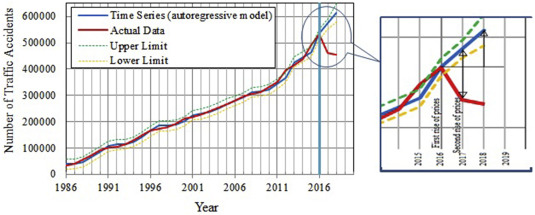
### source : https://www.sciencedirect.com/science/article/pii/S2352646718300553

In [550]:
# by doing a lot off outside research i found out this article talking about a study regarding this sudden drop,
# even this time series model needs to retrained to be used for the coming days to adapt to change of behaviors.

# as we can see the time series models was wrong on 2016, beacause that year start implementing VAT and increasing fuel prices.

In [551]:
# "Time series autoregressive analyses were performed for RTA from 1986 until 2018
# before and after the increase in fuel prices and the implementation of VAT.
# The results of RTA, autoregressive model forecasting, upper and lower limits of the model are presented in Fig.
# The autoregressive model showed a significance R-squared equal to 0.995.
# The results showed that there was a significant change after implementing VAT and increasing fuel prices.
# This indicates the importance of performing the interrupted time series analysis with one sample,
# but it was divided into two samples: before and after increase in fuel prices.
# This analysis could provide different models before and after increase in fuel prices and provide a clear picture
# about the effect of fuel price on RTA similar to the one studied herein."

### source : https://www.sciencedirect.com/science/article/pii/S2352646718300553

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

In [552]:
# Answer:
# By observing the data we can see the trends, and there is correlation between number of licenses and number of accidents,
# and that make sense because with more licenses means more drivers lead to crowded cites will lead to more accidents,
# but we notice that some regions have sudden decrease on accidents on the later years, with the outside
# research i think with there are several reasons, such as raise of VAT and fuel prices and implementing of saher system.

# another reason is, the fine was previously between 1,000 and 2,000 Saudi riyals,
# the kingdom raised it to a minimum of 20,000 Saudi riyals ($5,332) for first-time offenders.

# The fine doubles to 40,000 Saudi riyals for second-time offenders and the car will be impounded for 30 days.
# Third-time offenders will be slapped with a 60,000 Saudi riyal fine and their vehicles face potential permanent confiscation.

# I think with more features we can git more insite,
# such as the cause of accidents, price of fuel,
# more year data for accidents to observe the number of accidents before and after implementing saher and fine increase.
